# CMPINF 2100: Final exam - Main Notebook

## VASANTH MADHAVAN SRINIVASA RAGHAVAN

First Name: VASANTH MADHAVAN | Last Name: SRINIVASA RAGHAVAN

### **Detailed Notebooks**

1. 🔍 **Exploratory Data Analysis (EDA)** - [ipynb](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_2_EDA.ipynb)|[html](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_2_EDA.html)
2. ✨ **Clustering** - [ipynb](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_3_Clustering.ipynb)|[html](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_3_Clustering.html)
3. 🤖 **Model and Performance** - [ipynb](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_4_Modeling.ipynb)|[html](./Srinivasa_Raghavan_Vasanth_Madhavan_Final_Exam_4_Modeling.html)


## A. Introduction

* **a.b.c. Are you working on a REGRESSION or CLASSIFICATION problem?**

    The given problem can be approached as both REGRESSION OR CLASSIFICATION problem. I have decided to approach this as a **classification** problem by categorizing tracks with popularity < 50  as 0 (Unpopular) and songs with popularity > 50 as 1 (Popular) in a new columns called as `track_popularity_bin`. The goal is to come up with a classification model that would classify a track based on the characteristics as 0 or 1

* **d. Describe the major findings you have identified based on your analysis.**

    1. Continuous variables that represent the characteristics of a track (danceability, energy, loudness, valence, tempo, duration_ms etc.,) influence the response (target) variable - track_popularity
    2. The genre of the music also influences the track_popularity
    3. Certain genres are very unpopular compared to the others
    4. In general songs that have shorter `duration_ms` and high `loudness` tend to be more popular
    5. Model with complex formula tend to perform better
    
* **e. Which inputs/features seem to influence the response/outcome the most?**

    Following variables are the final input variables I have identifed after EDA

    1. duration_ms
    2. loudness
    3. energy
    4. playlist_genre

* **f. What supported your conclusion? Was it only through predictive models?**

    * Predictive Models, their coefficients and cross-validation
    * Also, following visualizations helped with identifying the potential input-to-output relationships

       1. Conditional Distribution of continuous variables GROUPED BY the response (target) variable
       2. Relationships between continuous variables GROUPED BY the response (target) variable
       3. Conditional Distribution of continuous variables GROUPED BY the response (target) variable and additional categorical variable
    
* **g. Could EDA help identify similar trends/relationships?**
    
    * No

* **h. Was clustering consistent with any conclusions from the predictive models?**

    * No, it was not consistent

* **i. What skills did you learn from going through this project?**

    1. Building a machine learning model from scratch
    2. Data Exploration
    3. Clustering
    4. Model Fitting
    5. Model Performance validation techniques
    
*   **j. What general skills can you take away from the project to apply to applications more specific to your area of interest?**
    
    * I will be leveraging the various modeling techniques that I learnt in this project and use it in my area of interest - finance

## Import Required Modules

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import statsmodels.formula.api as smf\

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [22]:
sns.set_palette("colorblind")

In [23]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv(songs_url)

## B. Exploratory Data Analysis (EDA)

### Basic Information

In [24]:
df.shape

(32833, 23)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [26]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [27]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [28]:
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

### Create a target variable - track_populairy_bin (y)

In [29]:
# Create a target variable - track_populairy_bin (y)

df['track_popularity_bin'] = np.where( df.track_popularity > 50, 1, 0 )
df = df.astype({'track_popularity_bin': 'object'})
df.track_popularity_bin.value_counts(normalize=True)

track_popularity_bin
0    0.574757
1    0.425243
Name: proportion, dtype: float64

### Handling Duplicates

In [31]:
#  Removing duplicates - More details in the EDA notebook
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_name                28352 non-null  object 
 2   track_artist              28352 non-null  object 
 3   track_popularity          28356 non-null  int64  
 4   track_album_id            28356 non-null  object 
 5   track_album_name          28352 non-null  object 
 6   track_album_release_date  28356 non-null  object 
 7   playlist_name             28356 non-null  object 
 8   playlist_id               28356 non-null  object 
 9   playlist_genre            28356 non-null  object 
 10  playlist_subgenre         28356 non-null  object 
 11  danceability              28356 non-null  float64
 12  energy                    28356 non-null  float64
 13  key                       28356 non-null  int64  
 14  loudness   

### Analyzing and Visualizing Categorical Variables

In [35]:
df.describe(include='object')

track_id track_name track_artist  \
count                    28356      28352        28352   
unique                   28356      23449        10692   
top     6f807x0ima9a1j3VPbc7VN    Breathe        Queen   
freq                         1         18          130   

                track_album_id track_album_name track_album_release_date  \
count                    28356            28352                    28356   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              135                      201   

          playlist_name             playlist_id playlist_genre  \
count             28356                   28356          28356   
unique              448                     470              6   
top     Indie Poptimism  72r6odw0Q3OWTCYMGA7Yiy            rap   
freq                294                     100           5401   

       playlist_subgenre  track_popularity_bin  
count              28356                 28356  
unique                24                     2  
top     southern hip hop                     0  
freq                1583                 17850

❌ There are far too many unique values in the columns `track_artist`, `playlist_name`, `track_album_name`, `track_name`. This makes these columns not very useful for training a model and it is not practical to show visualization for these columns. Note: Reg visualization I confirmed with the instructor on the Coursera Discussion Forum that it is not necessary to show visualization for categorical variables with far too many unique values.

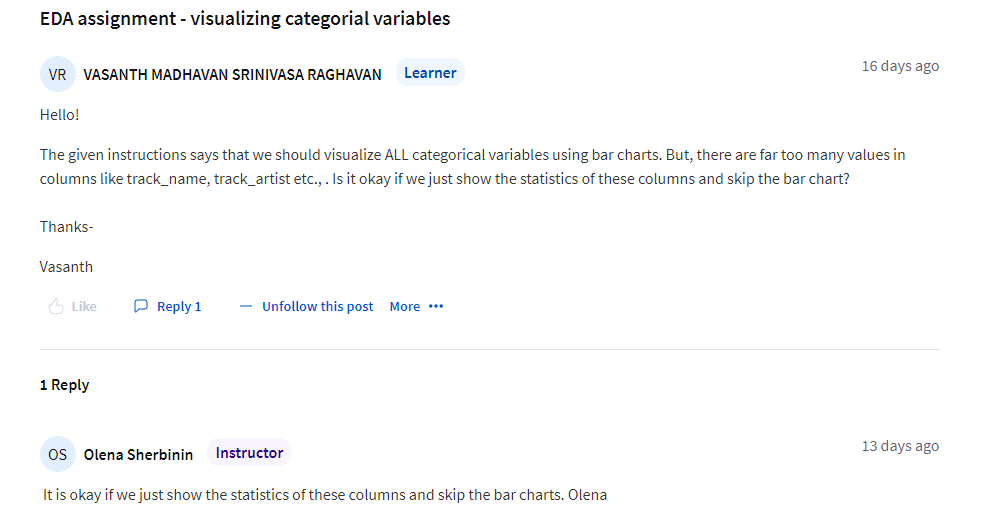

❌ Identifier columns like `track_id`, `track_album_id` and `playlist_id` will also not be very useful

In [59]:
df.drop(['track_id','track_album_id','playlist_id','track_artist','playlist_name', 'track_name', 'track_album_name'],
        inplace=True,
        axis=1)

#### Create new columns

The given data presents us with the opportunity to create additional columns. These new columns may have an impact on the target variable.

In this case, I have used  the column `track_album_release_date` to create two new columns `release_year` and `release_month`

In [60]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='mixed')

In [61]:
df['release_year'] = df.track_album_release_date.dt.year

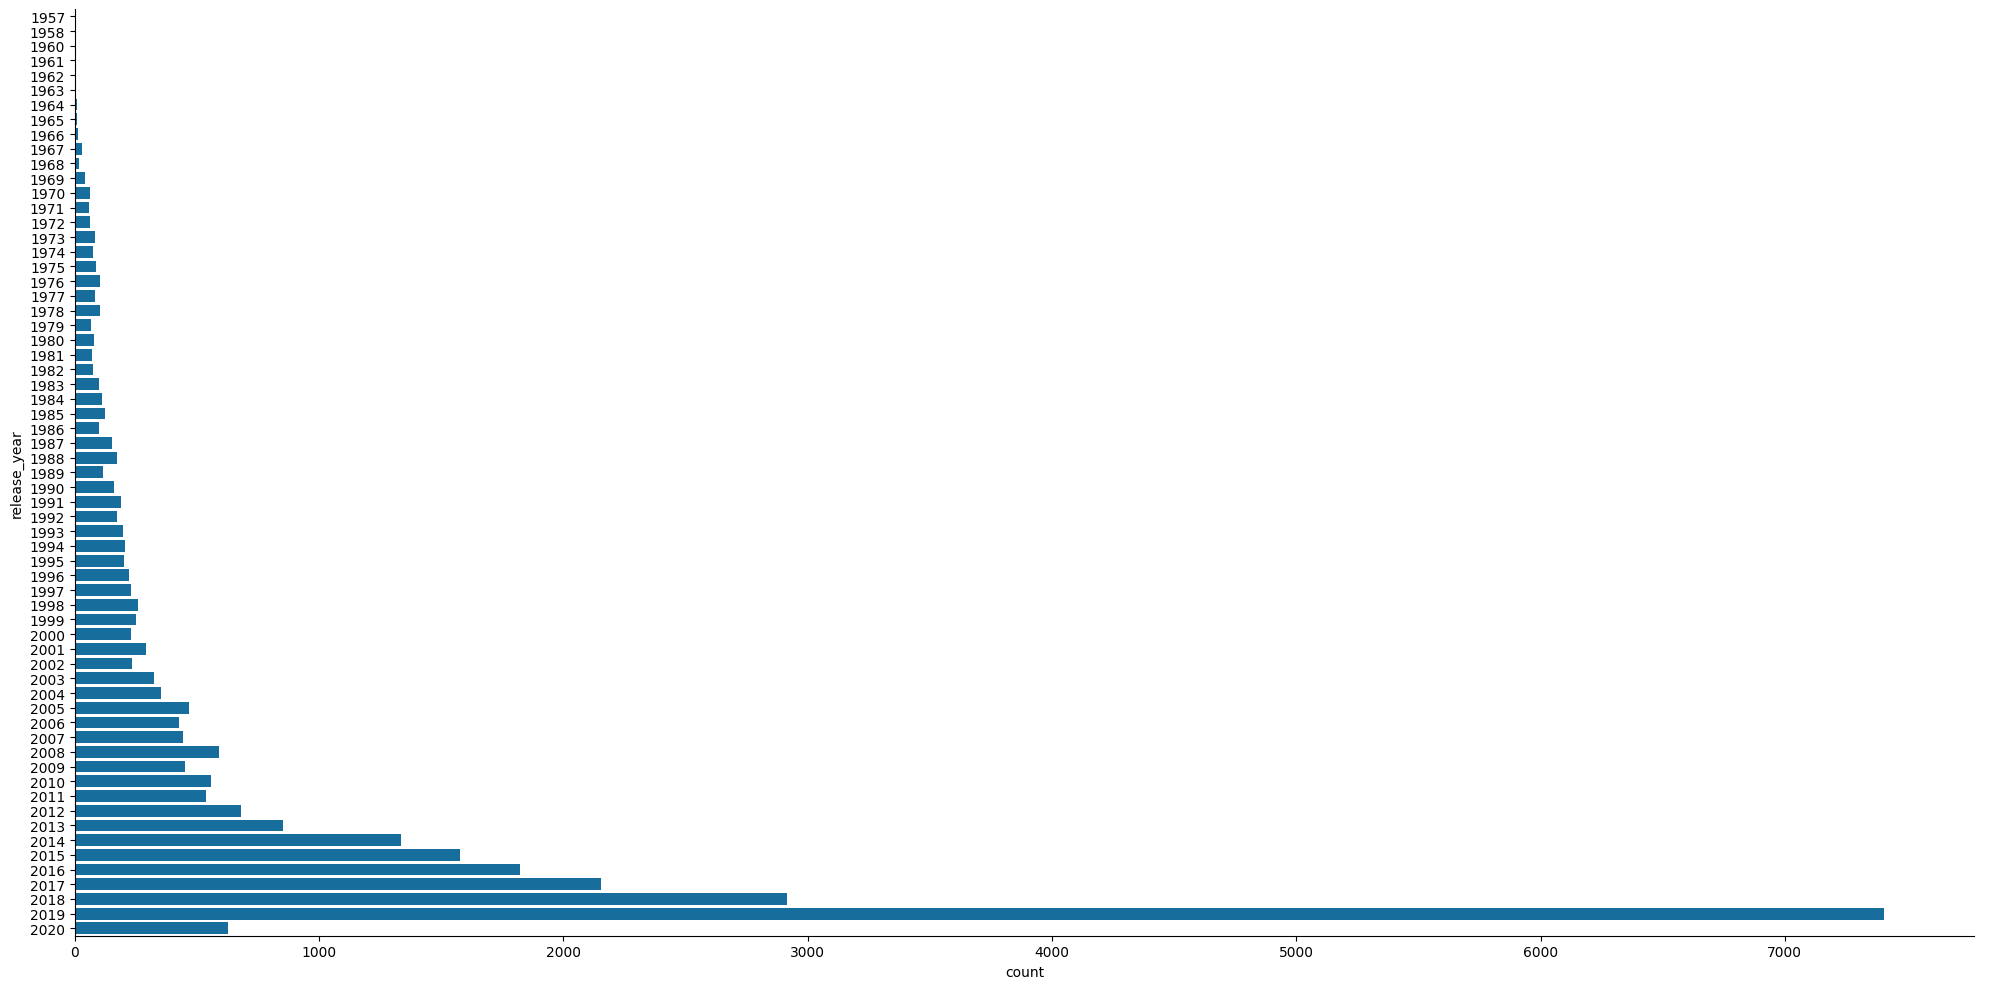

In [62]:
sns.catplot(data = df, y='release_year', kind='count', height=10, aspect=2)

plt.show()

💡 As seen above, the dataset is mostly made of songs released in the recent years rather than older years. This suggests that we can probably create one more variable that represents the release_year in two buckets. We can put songs released after 2010 in one bucket and songs released before 2010 in another

In [63]:
df['release_year_bin'] = np.where( df.release_year < 2010 , 'older', 'recent')

In [64]:
df['release_month'] = df.track_album_release_date.dt.month

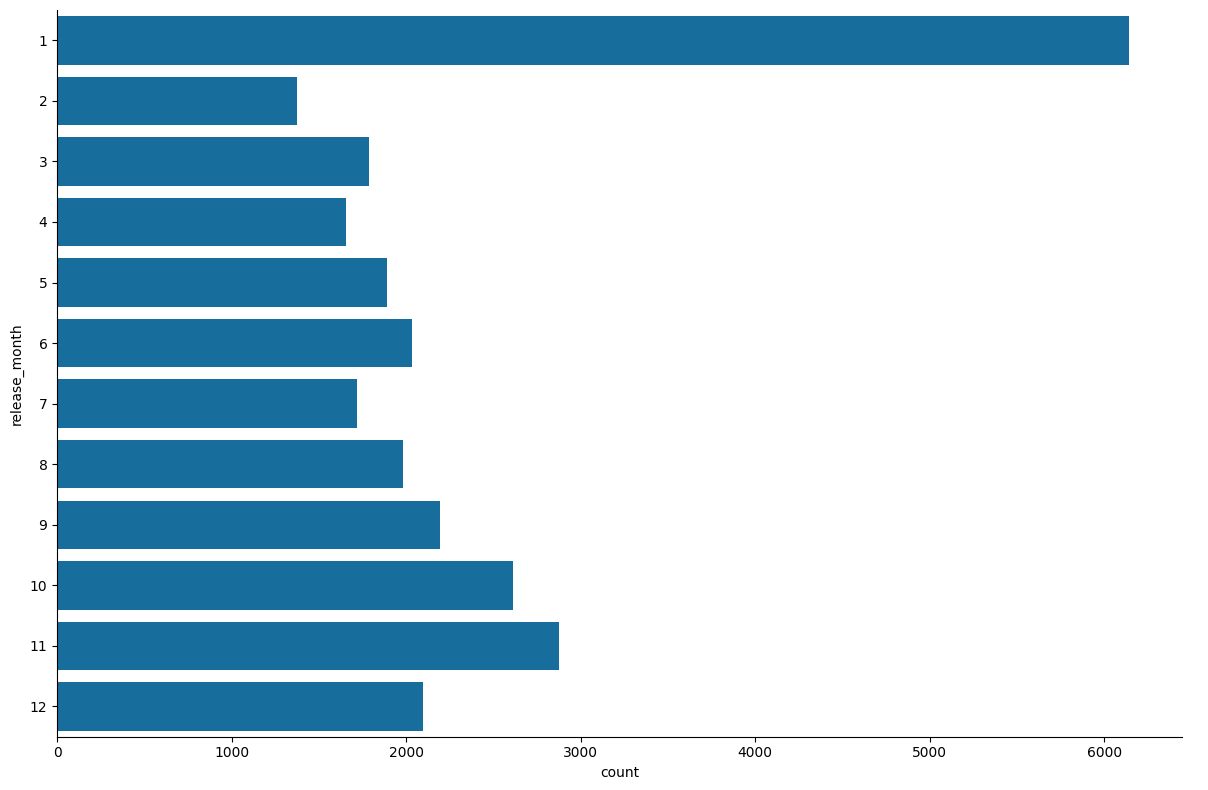

In [65]:
sns.catplot(data = df, y='release_month', kind='count', height=8, aspect=1.5)

plt.show()

💡 Majority of songs in the given dataset are release in the month of Jan

Since, `track_album_release_date` has been split into `release_year` and `release_month` the column can be dropped

In [66]:
df.drop(['track_album_release_date'], axis=1, inplace=True)

💡 Let's visualize additional variables - `key` and `mode`

Although, `key` and `mode` are numeric columns, since there are less unique values these can be considered as categorical variables

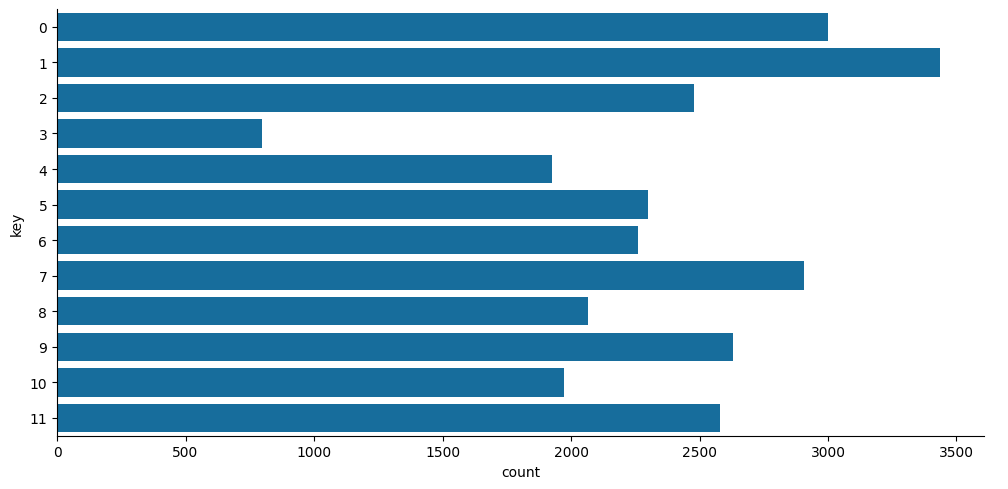

In [33]:
sns.catplot(data = df, y='key', kind='count', height=5, aspect=2)

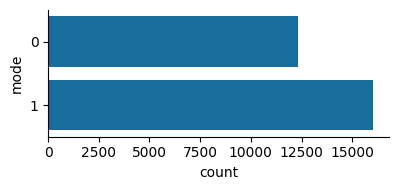

In [34]:
sns.catplot(data = df, y='mode', kind='count', height=2, aspect=2)

### Analyzing and Visualizing Continous Variables

In [36]:
df.describe()

track_popularity  danceability        energy           key  \
count      28356.000000  28356.000000  28356.000000  28356.000000   
mean          39.329771      0.653372      0.698388      5.368000   
std           23.702376      0.145785      0.183503      3.613904   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28356.000000  28356.000000  28356.000000  28356.000000   
mean      -6.817696      0.565489      0.107954      0.177176   
std        3.036243      0.495701      0.102556      0.222803   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.309250      0.000000      0.041000      0.014375   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.709000      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence        tempo  \
count      28356.000000  28356.000000  28356.000000  28356.00000   
mean           0.091117      0.190958      0.510387    120.95618   
std            0.232548      0.155894      0.234340     26.95456   
min            0.000000      0.000000      0.000000      0.00000   
25%            0.000000      0.092600      0.329000     99.97200   
50%            0.000021      0.127000      0.512000    121.99300   
75%            0.006570      0.249000      0.695000    133.99900   
max            0.994000      0.996000      0.991000    239.44000   

         duration_ms  
count   28356.000000  
mean   226575.967026  
std     61078.450819  
min      4000.000000  
25%    187742.000000  
50%    216933.000000  
75%    254975.250000  
max    517810.000000

In [37]:
df_features = df.select_dtypes('number').copy()
df_features.drop(['track_popularity'], axis=1, inplace=True) # Dropping Target variable

In [38]:
df_objects = df.select_dtypes('object').copy()

In [39]:
id_cols = ['rowid', 'track_popularity'] + df_objects.columns.to_list()

In [40]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

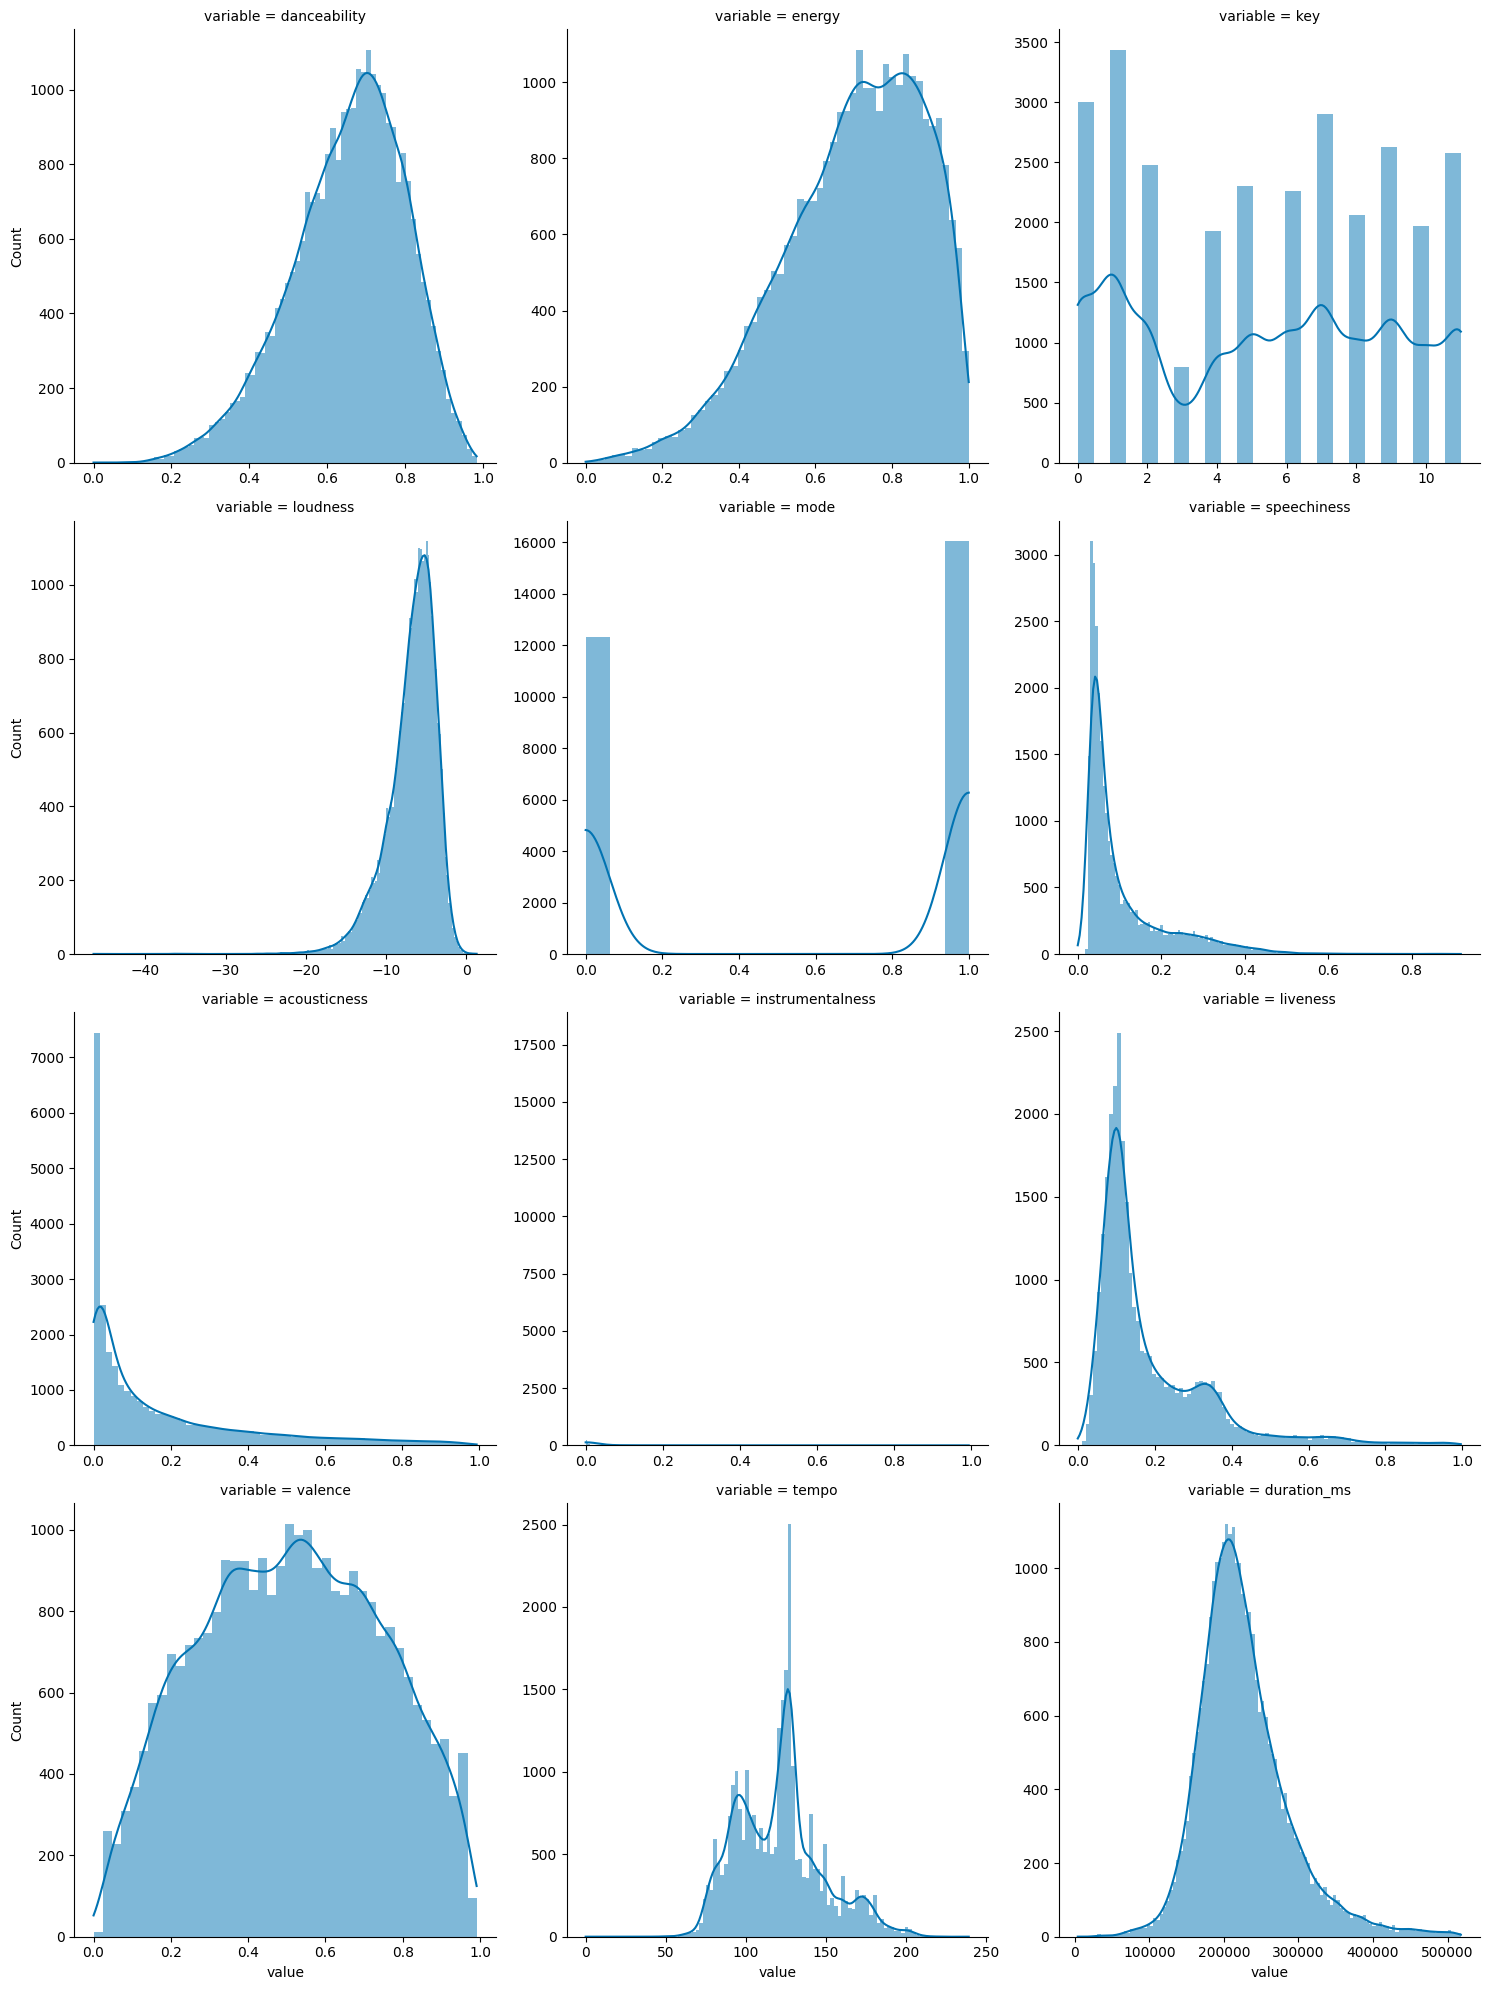

In [42]:
sns.displot(data = df_lf, x='value', col='variable', kind='hist', kde=True,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,
            col_wrap=3)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.tight_layout()
plt.show()

#### 💡 Observation

* We can see that  speechiness, instrumentalness, liveness, acousticness and duration_ms are skewed right.

* loudness, mode are skewed left.

* Only danceability, energy, valence, tempo have normal / approx normal distribution.

📌 Before we can use the data for modeling, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.

### Visualizing Relationships

### Categorical-to-categorical relationships

##### track_popularity_bin Vs playlist_genre

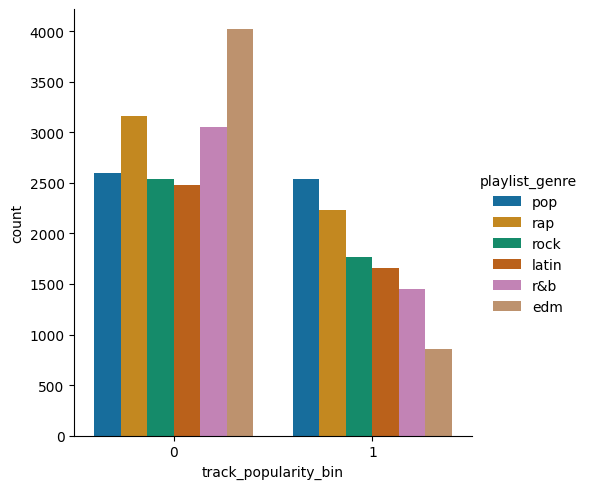

In [46]:
sns.catplot( data = df, x='track_popularity_bin', hue='playlist_genre', kind='count' )

plt.show()

💡 The above visualization between `track_popularity_bin` and `playlist_genre` using **DODGED BAR CHART** shows that the `edm` genre is the most unpopular genre. Other genres have approx same number of tracks across both unpopular and popular categories. We can also see that `pop` and `rap` are the most popular genres

#### playlist_subgenre Vs playlist_genre

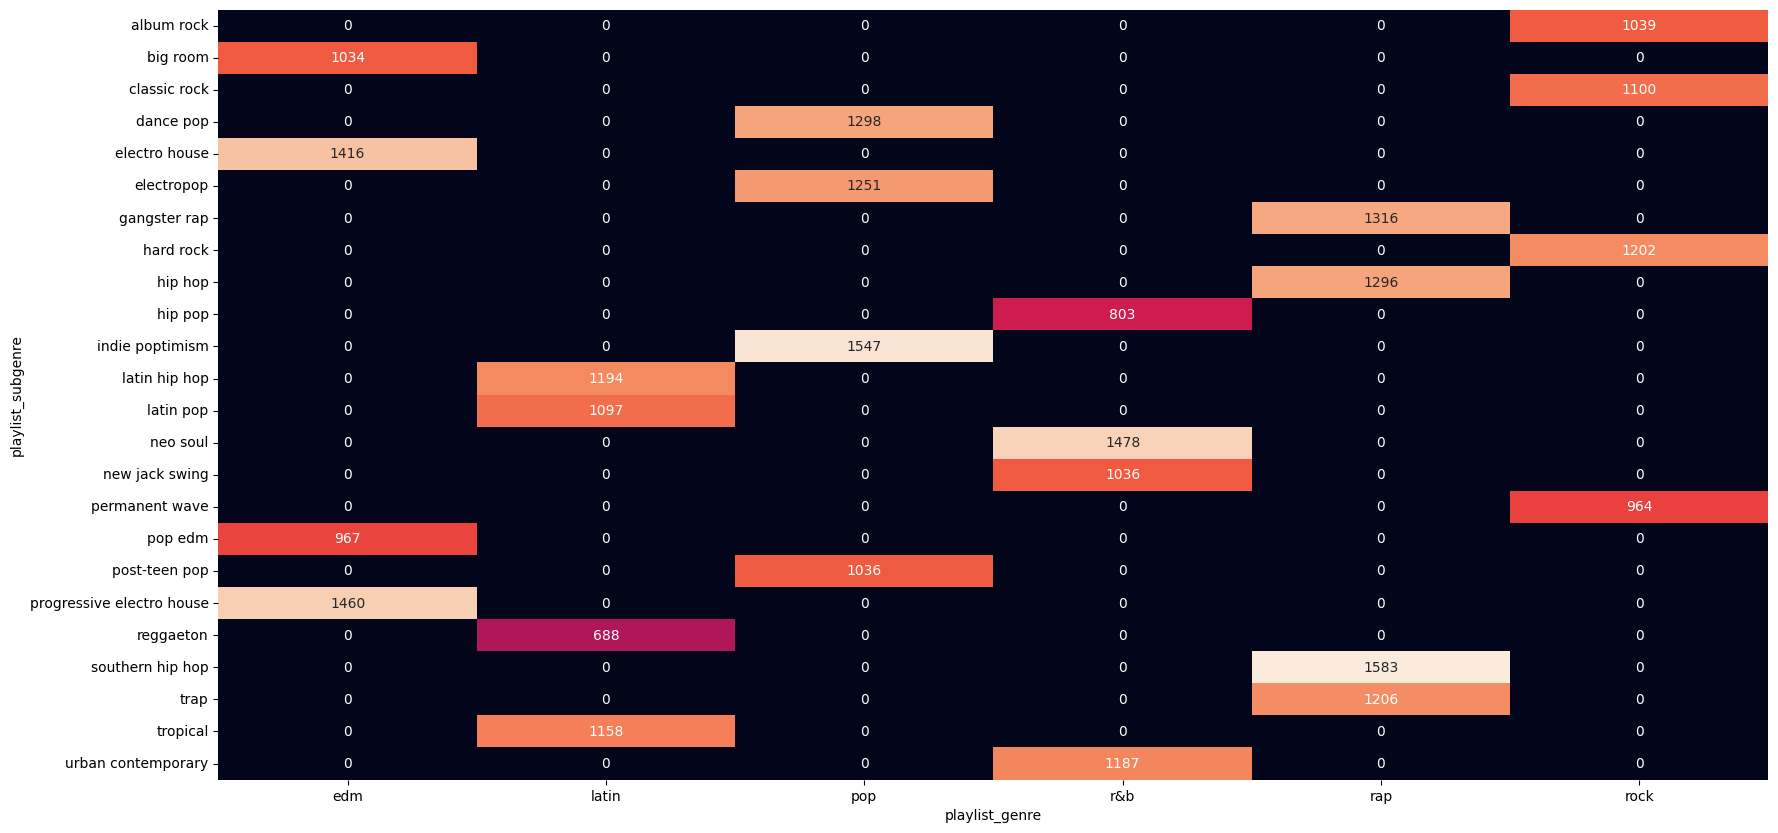

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap( pd.crosstab( df.playlist_subgenre, df.playlist_genre ), ax = ax,
             annot=True, annot_kws={'size': 10}, fmt='d',
             cbar=False)

plt.show()

📌 Above heatmap shows that the `playlist_subgenre` is highly correlated with `playlist_genre`. With this information, `playlist_subgenre` field can be **dropped** from the dataset as having highly correlated variables doesn't add a lot of value for the final model.

In [48]:
df.drop(columns=['playlist_subgenre'], inplace=True)

#### Categorial to Continuous

##### Key Vs Track Popularity

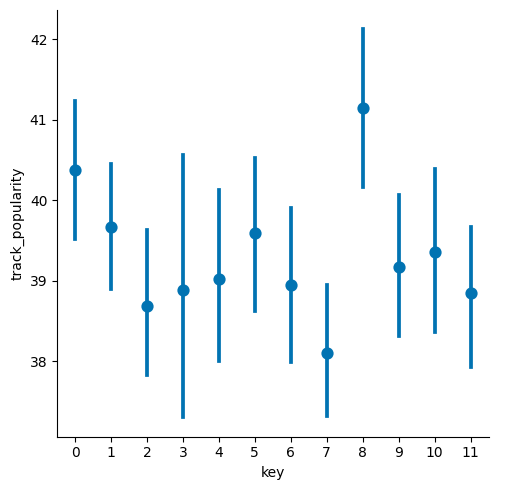

In [50]:
sns.catplot( data = df, x='key', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have higher value for `key`

#### Mode Vs Track Popularity

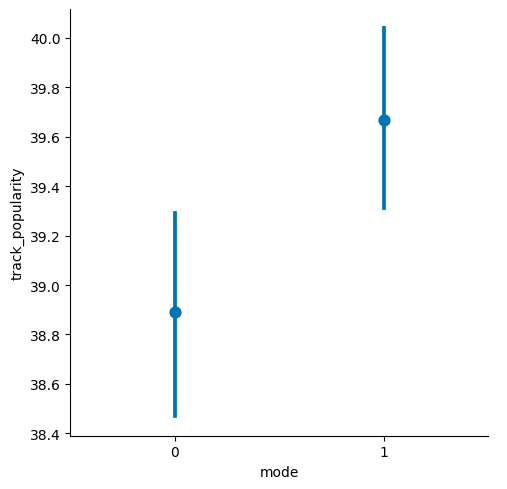

In [51]:
sns.catplot( data = df, x='mode', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have 1 as the `mode`

#### Continuous-to-Continuous Relationships

##### Corr plot for ALL variables

Correlation plot is one of the very effective way to view the relationships between continuous variables

Below is the corr plot for the given dataset

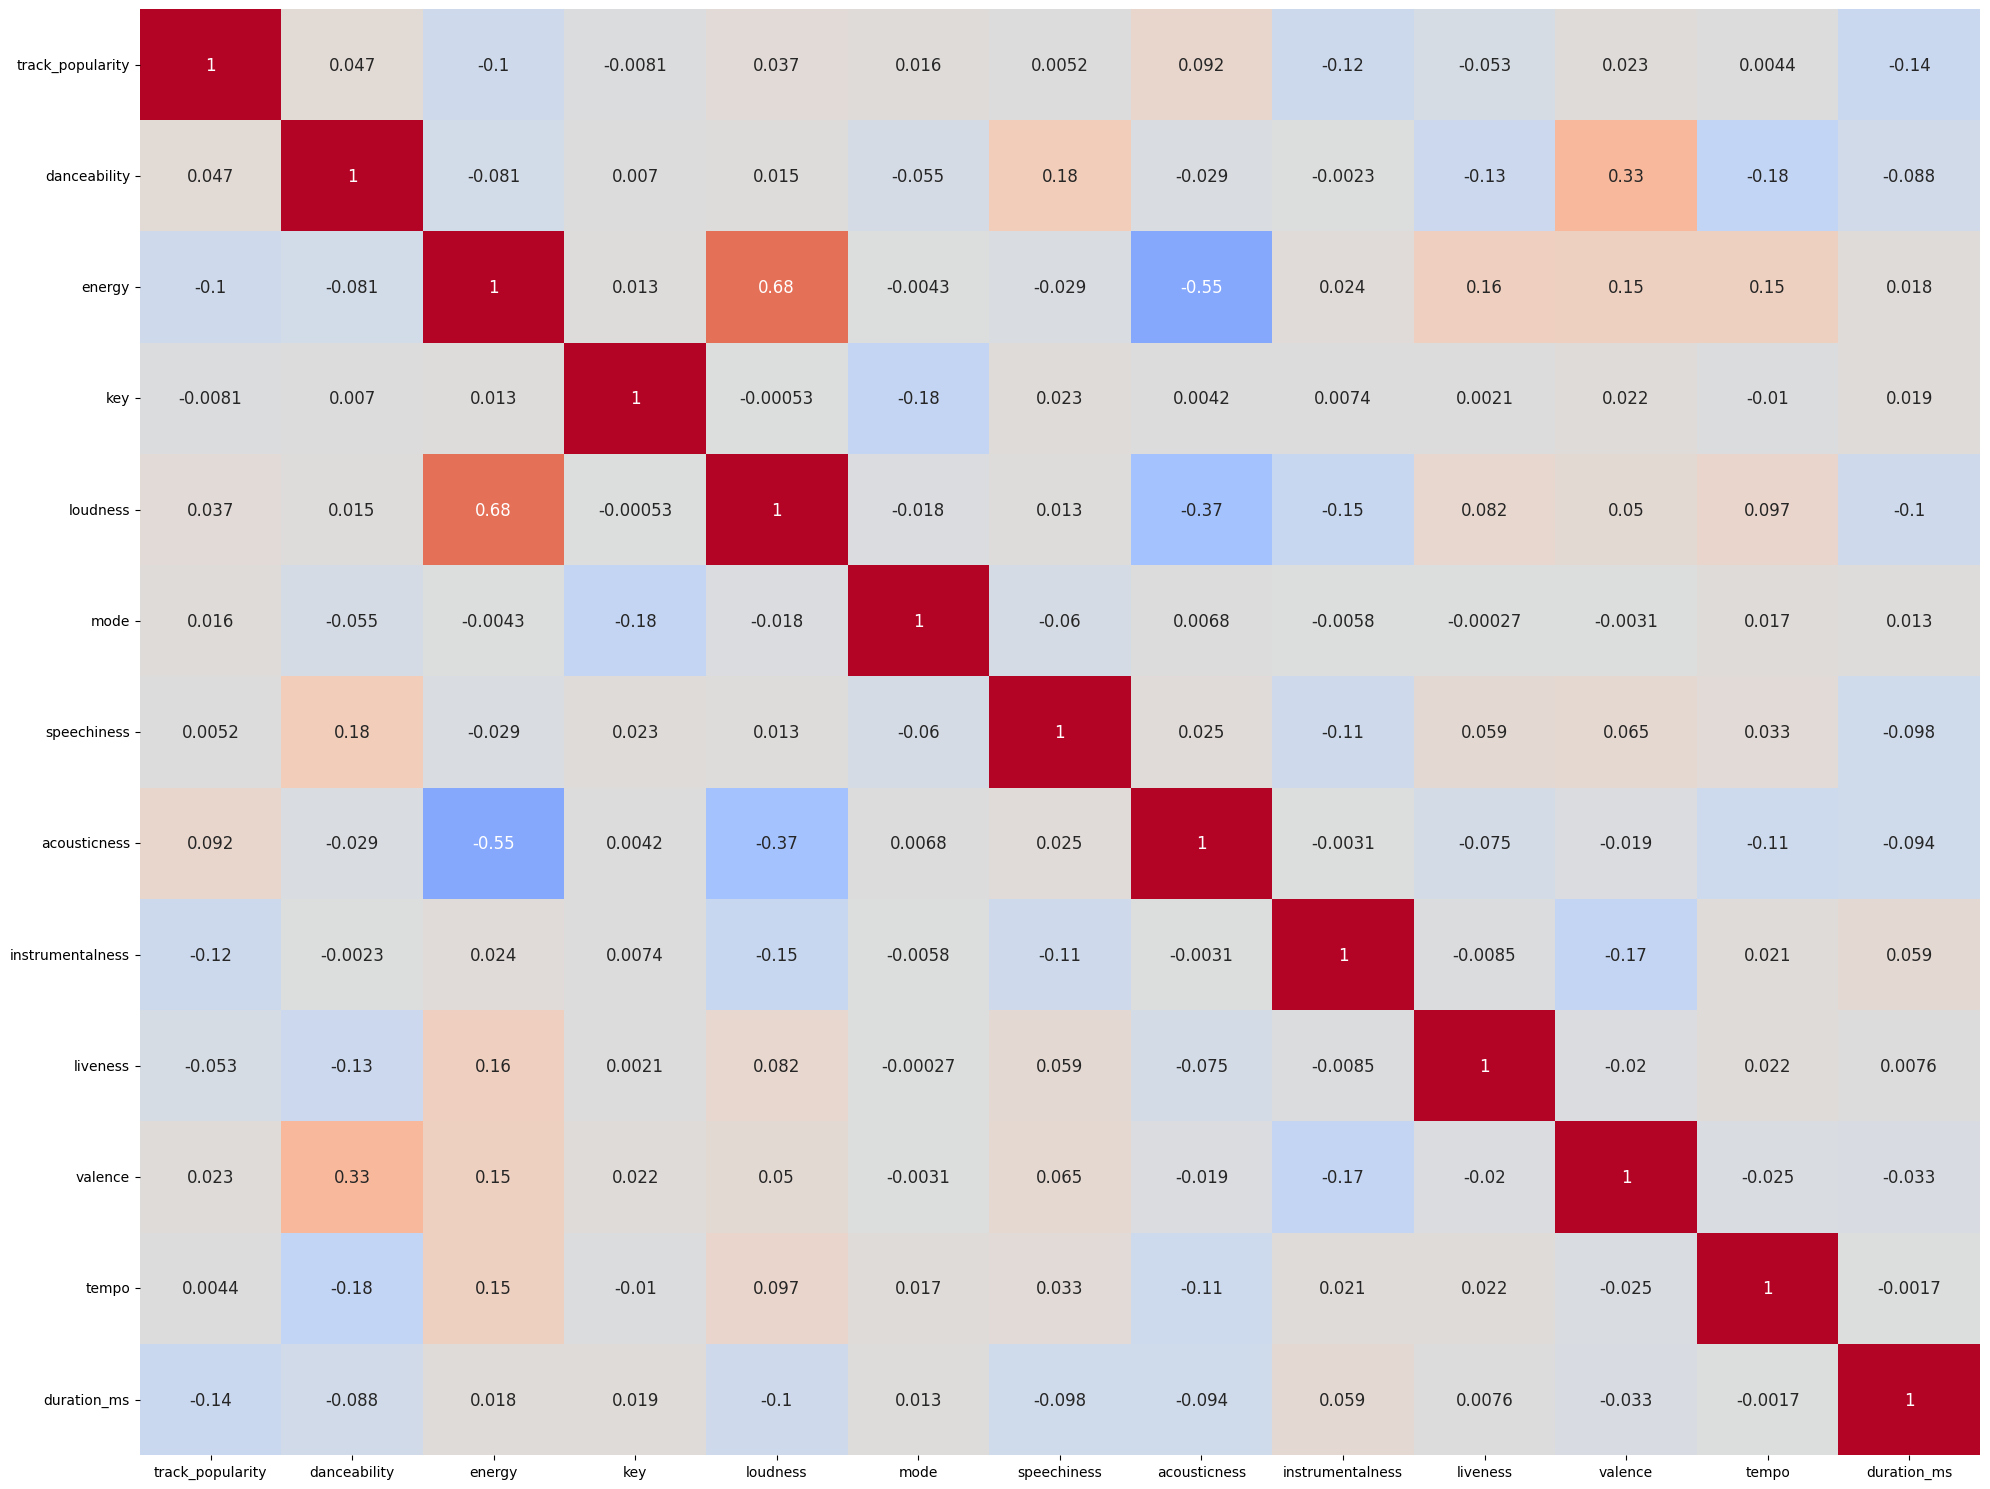

In [45]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(data = df.select_dtypes('number').corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 12},
            ax=ax)
plt.tight_layout()
plt.show()

💡 The above plot reveals the following
1. `energy` and `loudness` are highly positively correlated
2. `energy` and `acousticness` are highly negatively correlated
3. `track_popularity` has a low correlation with all other variables. This is good because we can use the other variables to "predict" track popularity

##### **Next, visualizing the relationships between few different continuous variables**

###### duration_ms Vs loudness

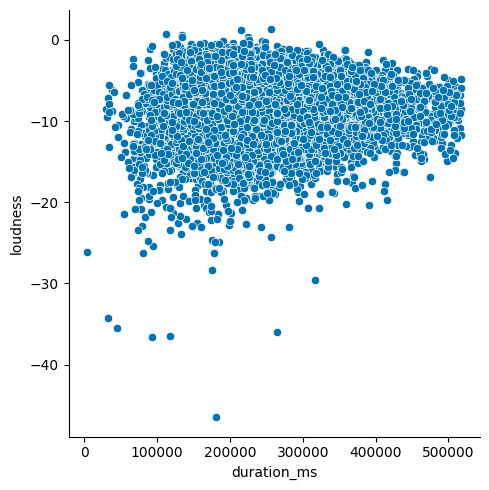

In [52]:
sns.relplot(data = df, x='duration_ms', y='loudness')

plt.show()

💡 Tracks that are longer tend to be less louder

###### acousticness Vs loudness

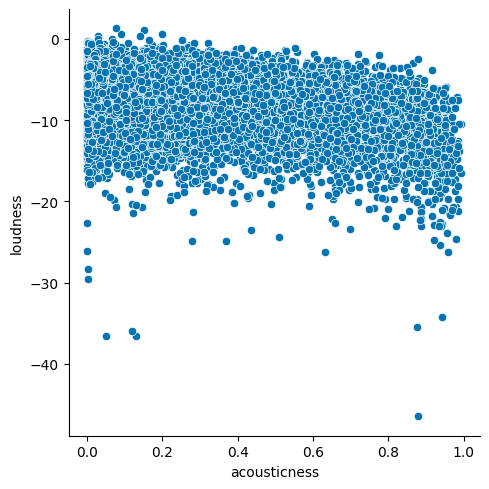

In [55]:
sns.relplot(data = df, x='acousticness', y='loudness')

plt.show()

💡 Tracks that are more acoustic tend to be less louder than the tracks that are less acoustic

###### valence Vs danceability

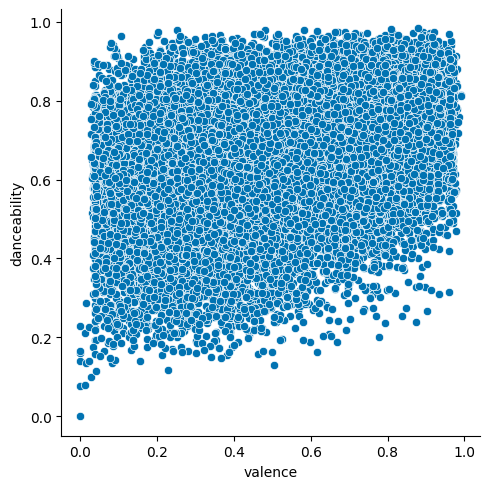

In [78]:
sns.relplot(data = df, x='valence', y='danceability')

plt.show()

💡 Danceability of tracks increase with increase in valence

#### Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values

Will be visualizing the conditional distribution of continuous inputs group by the response variable `track_popularity_bin`

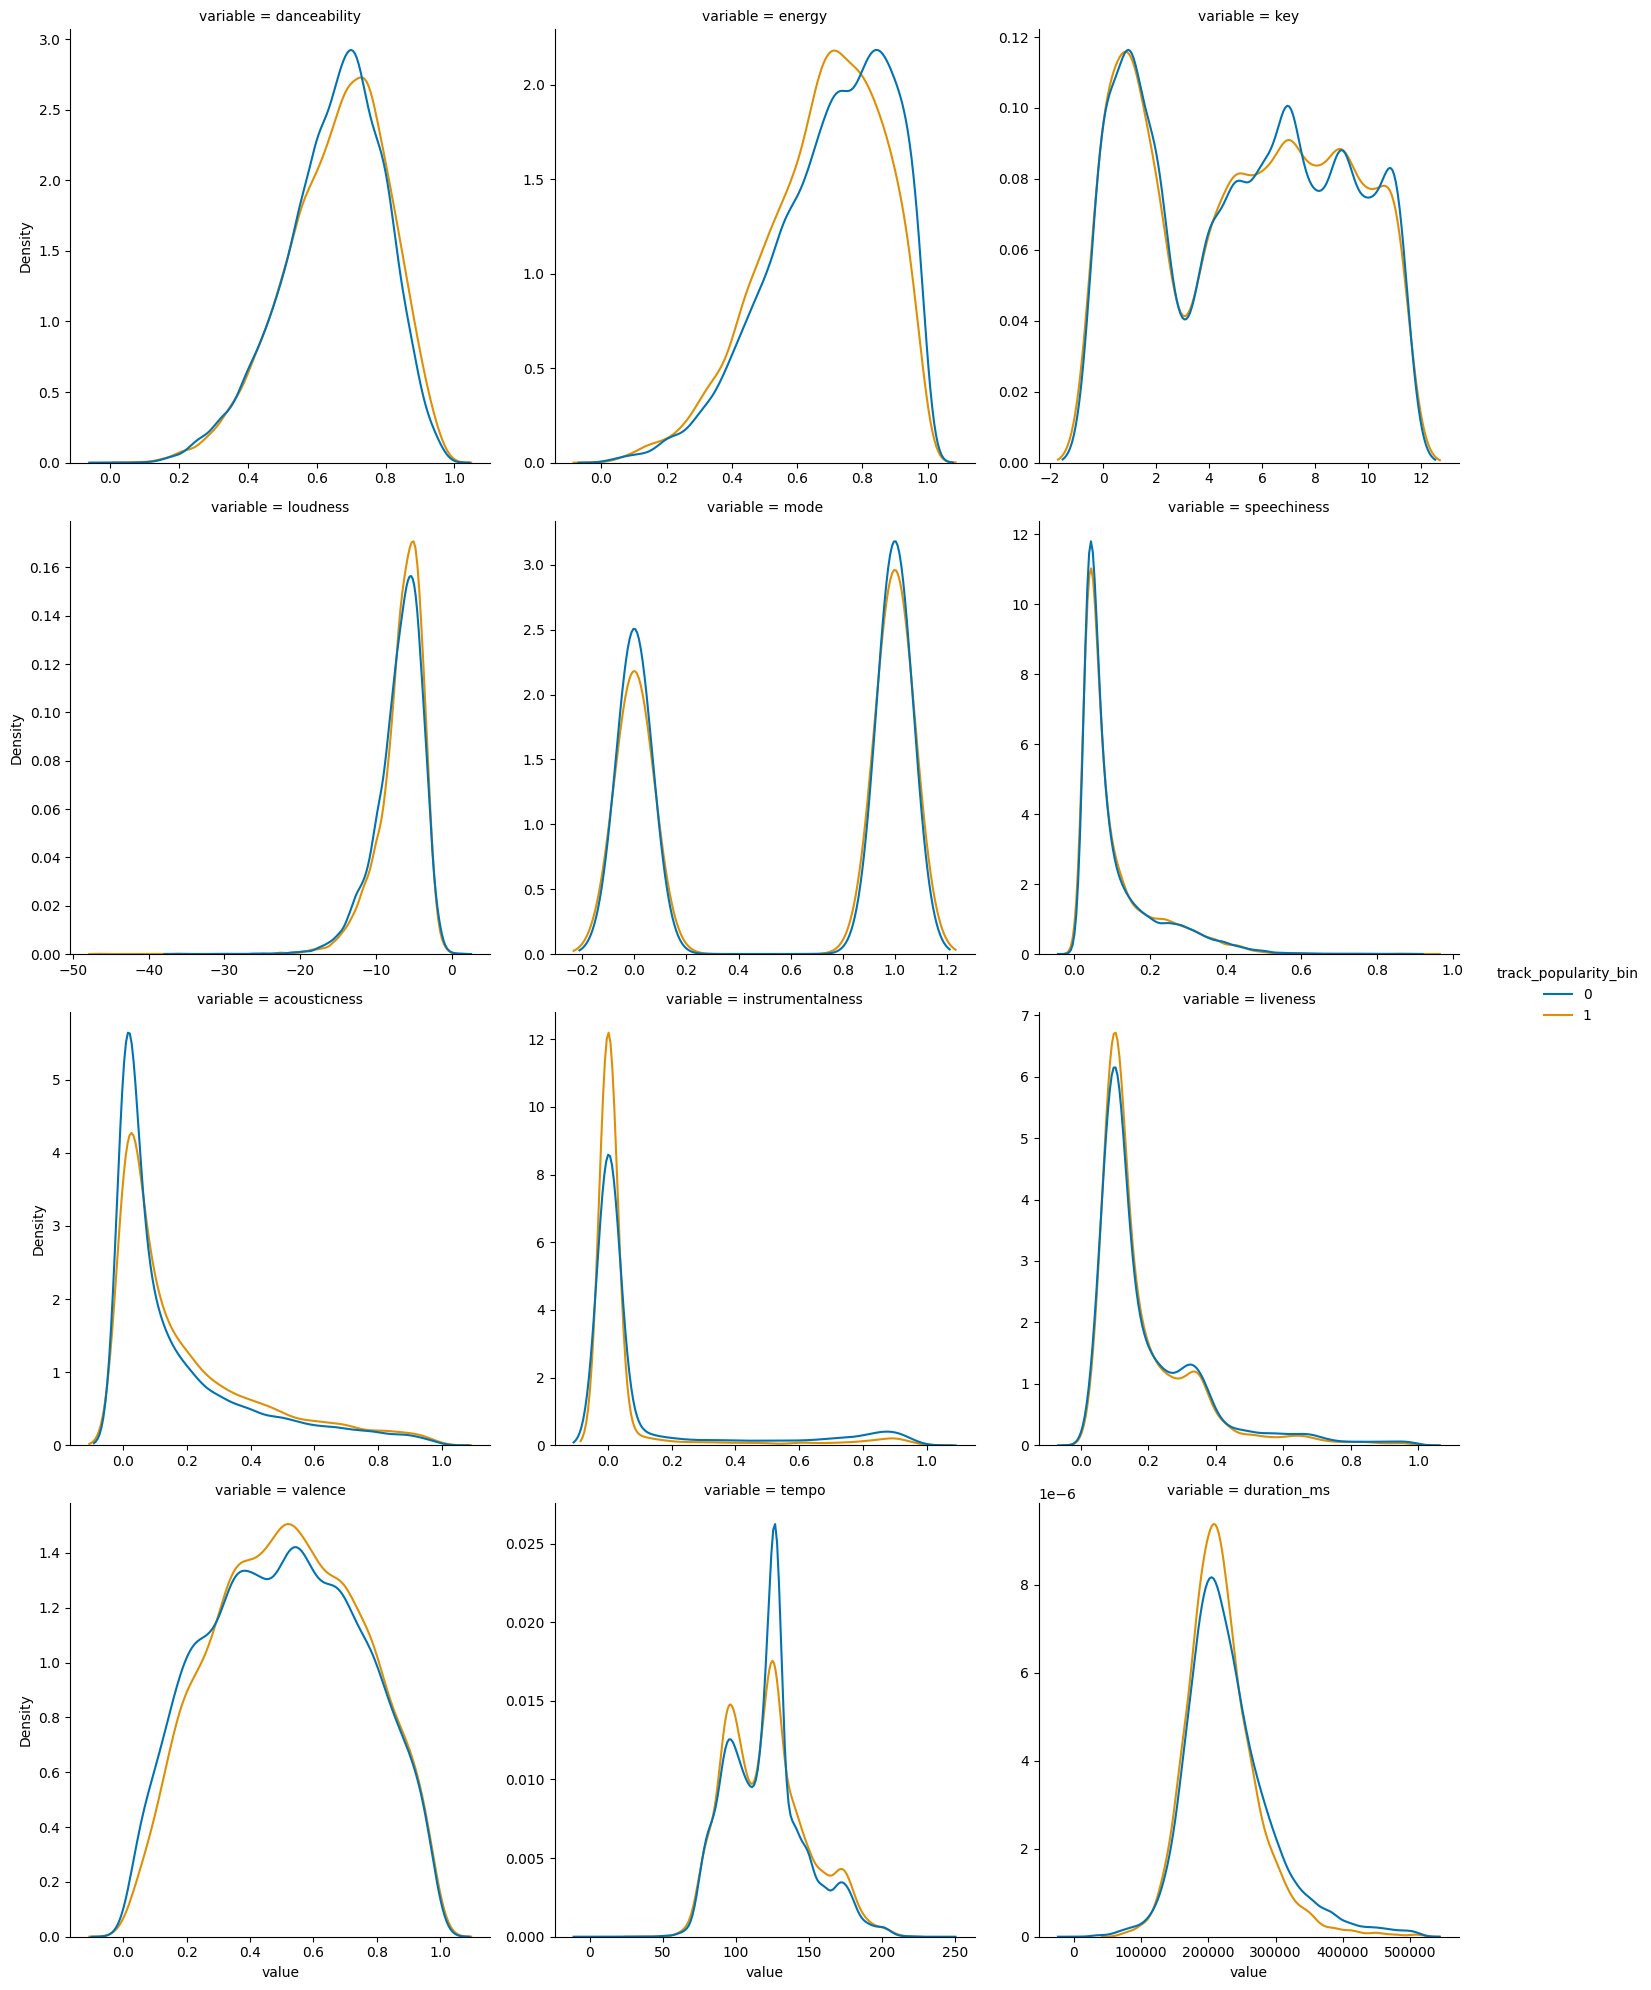

In [56]:
sns.displot(data = df_lf, x='value', col='variable', kind='kde',
            hue='track_popularity_bin',
            facet_kws={'sharex': False, 'sharey': False},
            common_norm=False,
            col_wrap=3
           )

plt.show()

💡 **Observations**
* `danceability` of popular songs (track_popularity_bin=1) is higher than the unpopular songs (track_popularity_bin=0)
* `acousticness` on popular songs is lower than the unpopular songs
* popular songs tend to have lesser duration compared to the unpopular songs

#### Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values

Here, leveraging PAIR PLOT to visualize the relationships between continuous inputs GROUPED BY the response (outcome) unique values

🚨 Splitting into two pair plot because notebook gets stuck

**PAIR PLOT - 1**

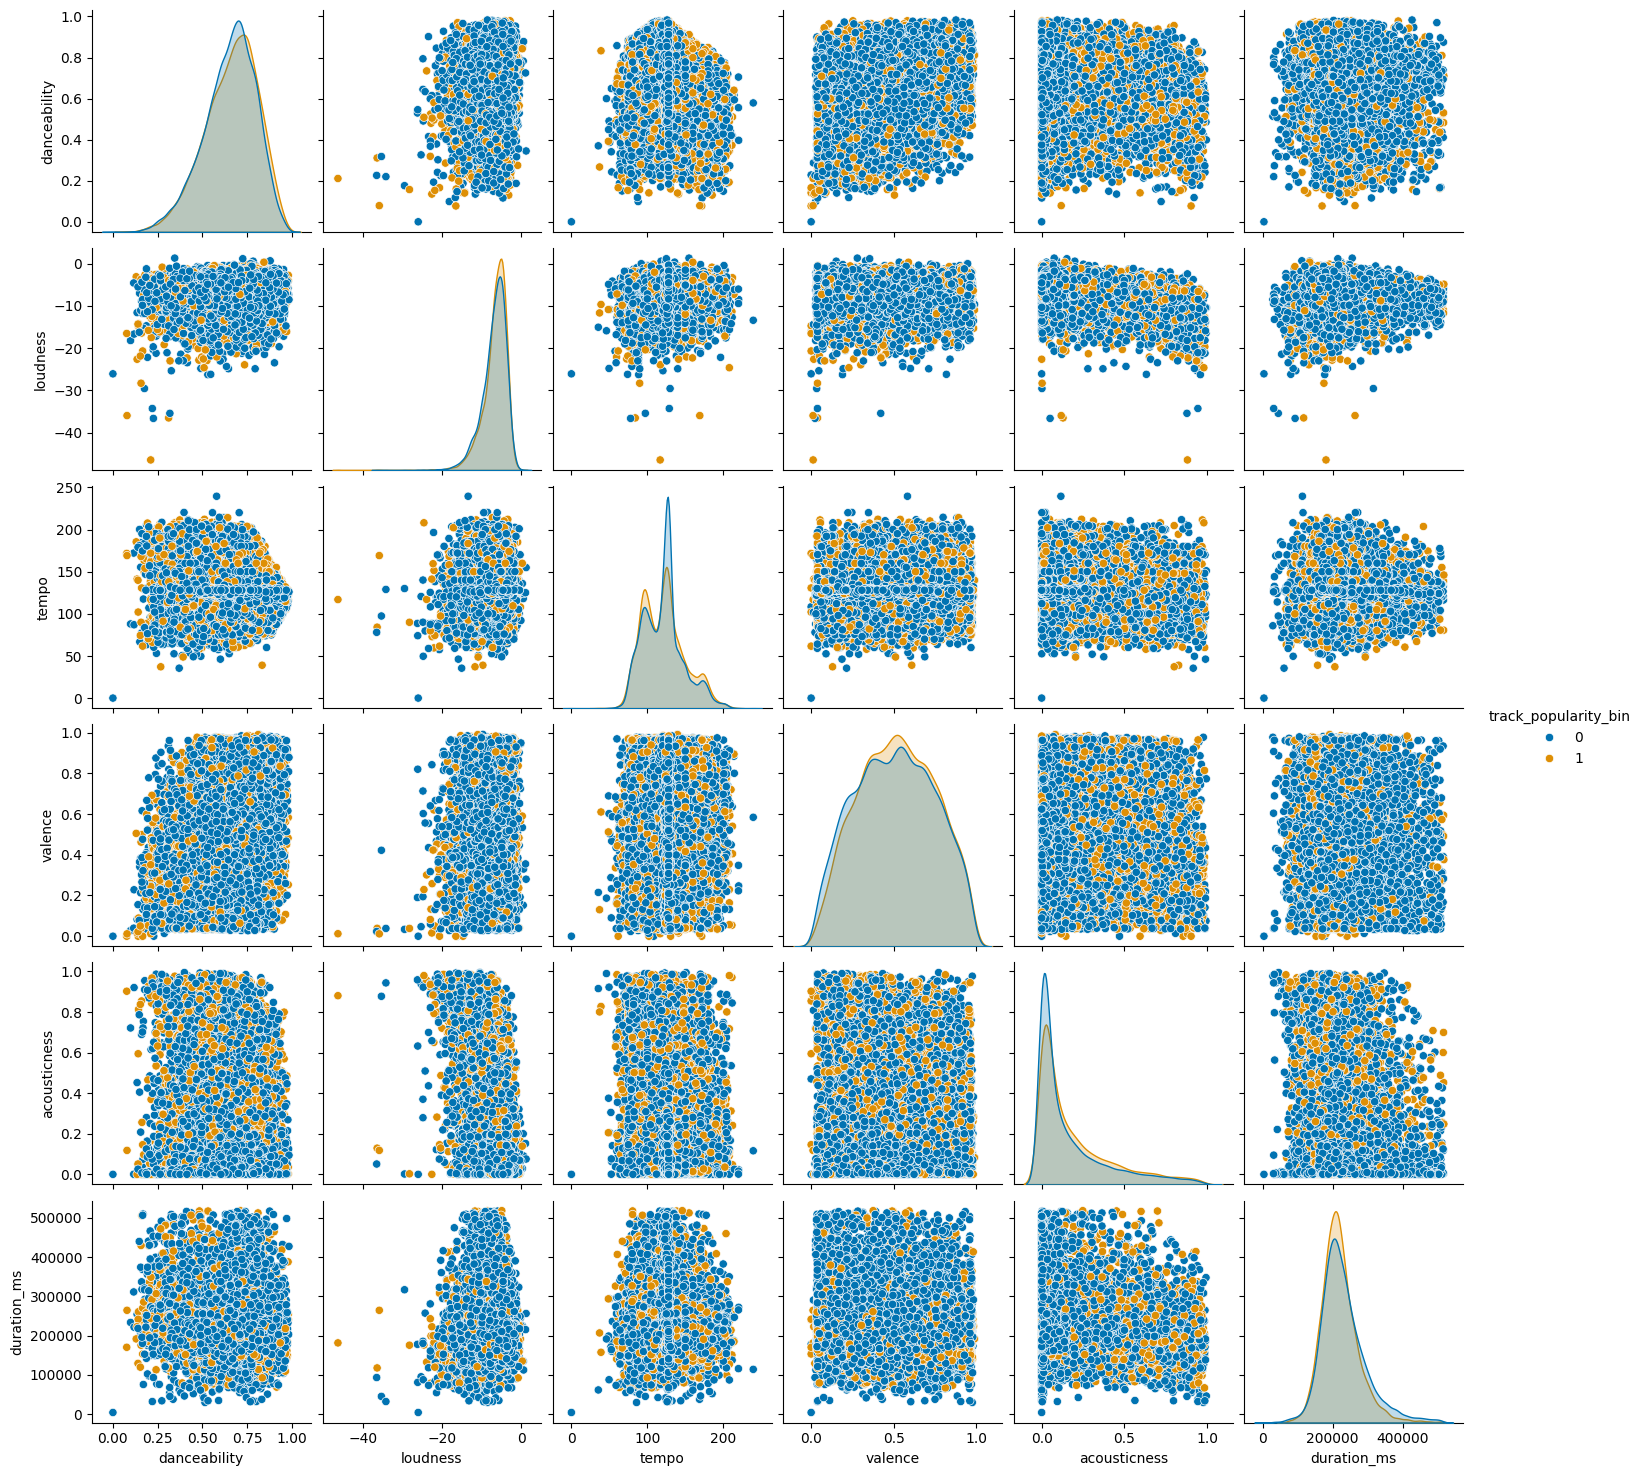

In [80]:
sns.pairplot(data=df[[ 'danceability', 'loudness', 'tempo',
                      'valence', 'acousticness',
                      'duration_ms', 'track_popularity_bin']],
             hue='track_popularity_bin',
             diag_kws={'common_norm': False})

plt.show()

💡 **Observations**
1. Popular tracks tend (track_popularity_bin=1) to be louder and shorter
2. The `danceability` increases as `tempo` increases
3. Popular songs tend to have higher tempo(track_popularity_bin=1) and danceability compared to the unpopular tracks (track_popularity_bin=1)
4. Given the `tempo` and `danceability` score one can determine the popularity of a track
5. Tracks that are more acoustic tend to be less louder

**PAIR PLOT - 2**

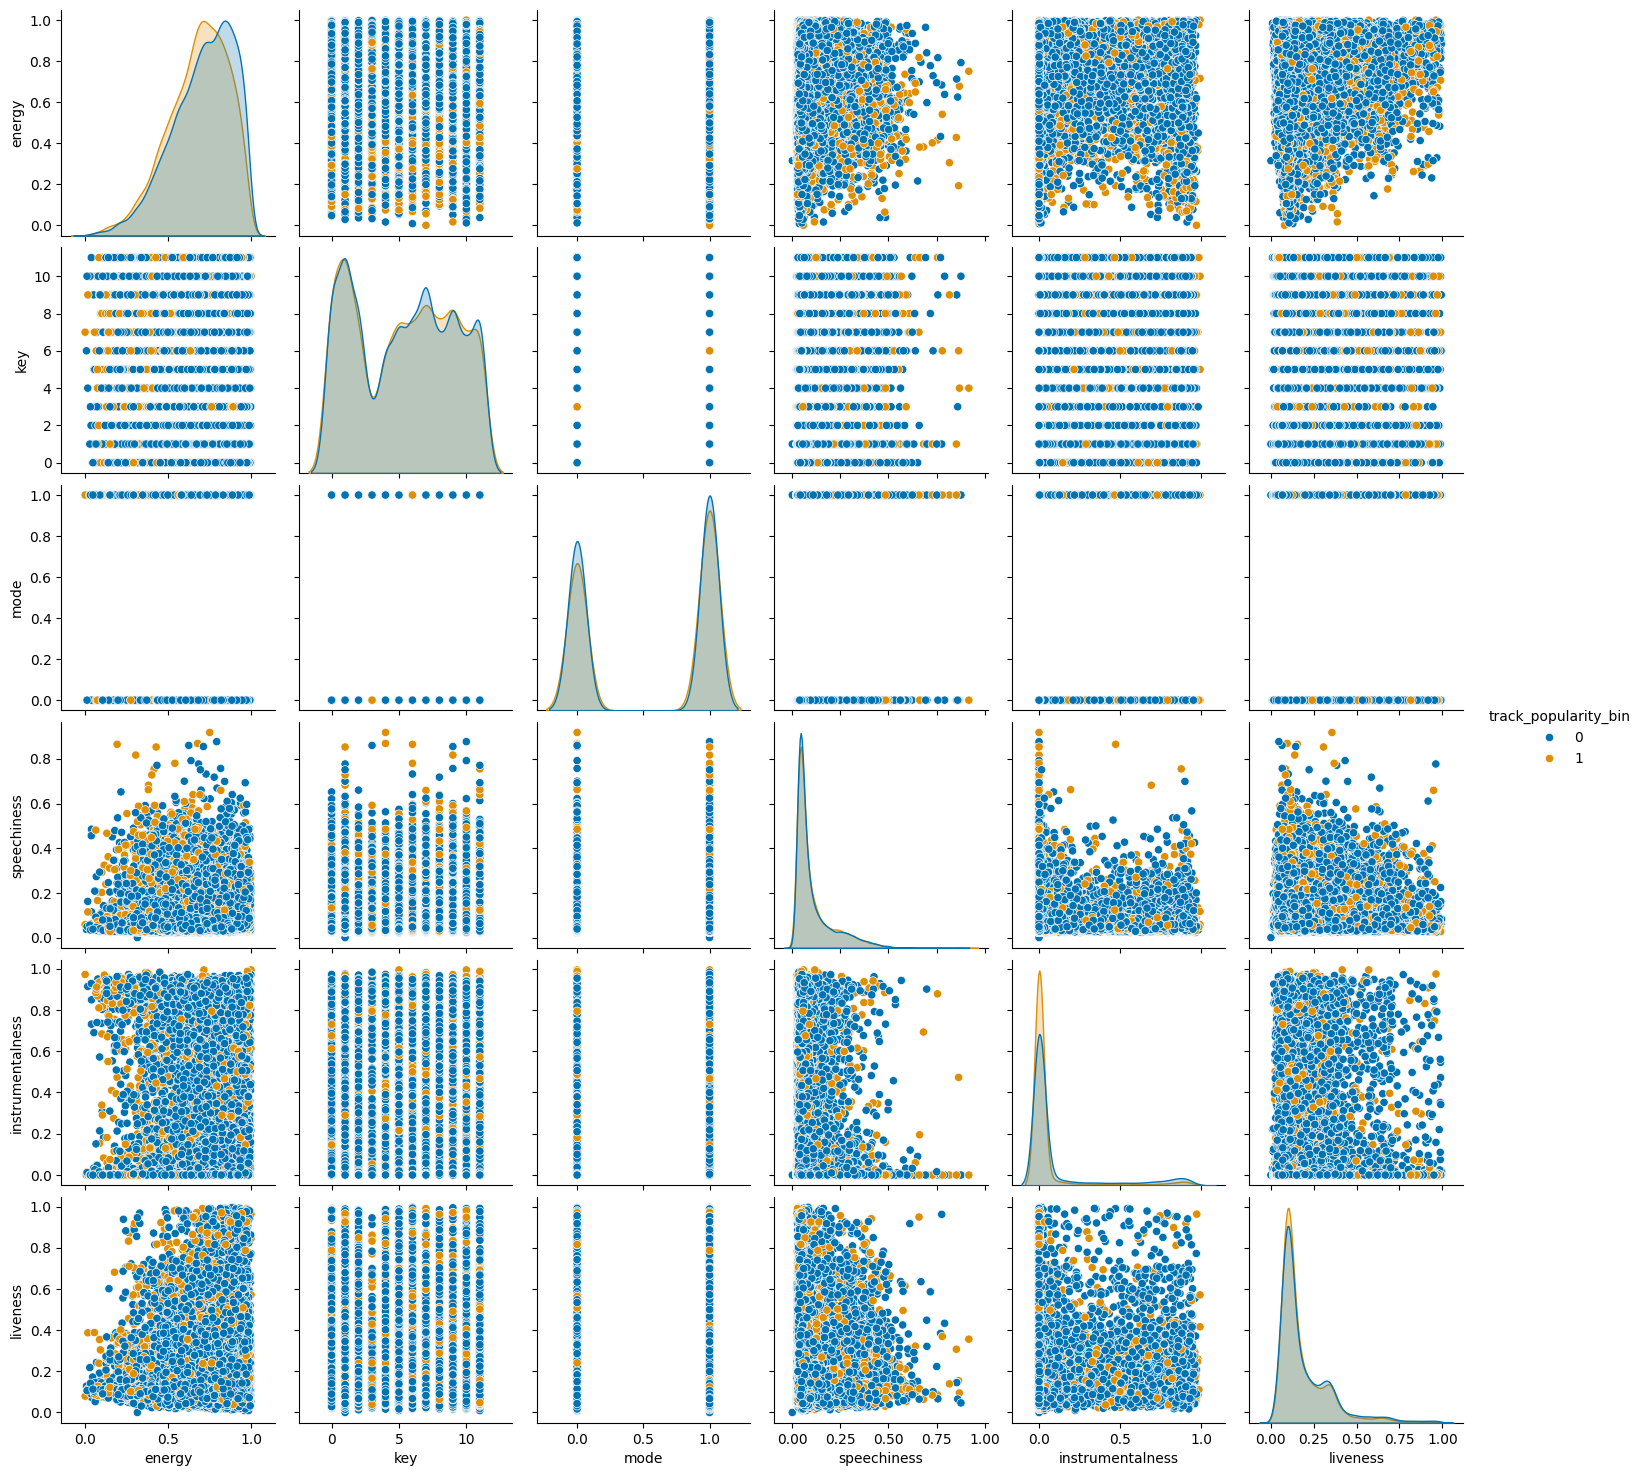

In [72]:
sns.pairplot(data=df[[ 'energy', 'key', 'mode',
                      'speechiness', 'instrumentalness',
                      'liveness', 'track_popularity_bin']],
             hue='track_popularity_bin',
             diag_kws={'common_norm': False})

plt.show()

💡 **Observations**

1. Track that have low `speechiness` tend to have high `instrumentalness`
2. Some popular tracks tend to have high `speechiness` as well as high `energy`. This could be because of tracks from `rap` genre that are speechy as well as highly energetic
3. Tracks that have high `liveness` tend to have high `energy`. This could be because songs that have high energy are more probable to be performed infront of live audience
4. Popular songs that have a `mode` of 1 tend to have high `key` value

#### Visualize the counts of combinations between the response (outcome) and categorical inputs

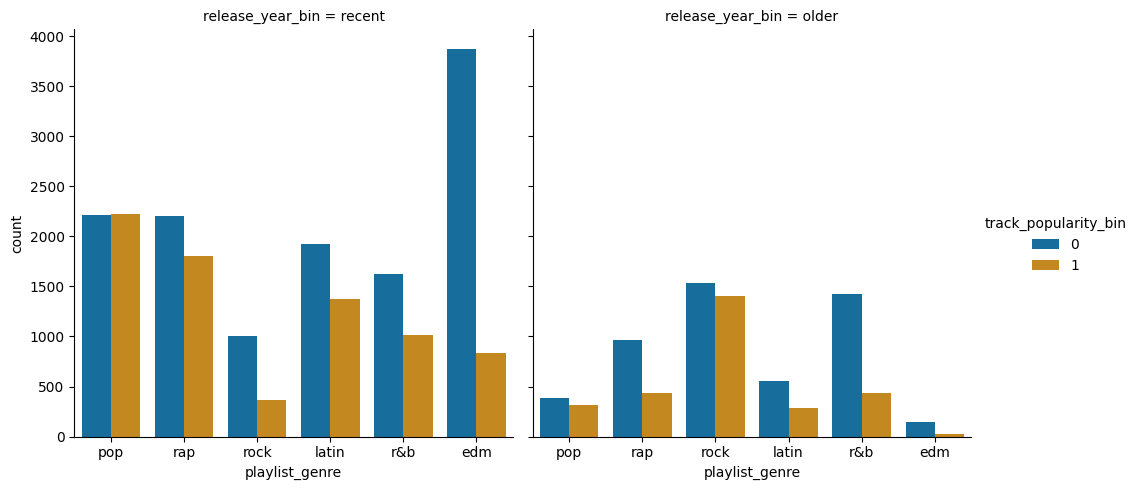

In [67]:
sns.catplot(data = df, x='playlist_genre', hue='track_popularity_bin', col='release_year_bin', kind='count', )

plt.show()

💡 **Observations**
1. `rock` used to be the most popular genre in the older years and it has been replaced by `pop` and `rap` in the recent years
2. `edm` is the most unpopular genre in the recent years

In [ ]:
C. 

### Addressing Skewness

In [13]:
df_features = df.select_dtypes('number').copy()
df_features.drop(['track_popularity'], axis=1, inplace=True)

In [14]:
df_objects = df.select_dtypes('object').copy()

In [15]:
id_cols = ['rowid', 'track_popularity'] + df_objects.columns.to_list()

In [16]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

In [17]:
df_lf

rowid  track_popularity playlist_genre track_popularity_bin  \
0           0                66            pop                    1   
1           1                67            pop                    1   
2           2                70            pop                    1   
3           3                60            pop                    1   
4           4                69            pop                    1   
...       ...               ...            ...                  ...   
340267  32828                42            edm                    0   
340268  32829                20            edm                    0   
340269  32830                14            edm                    0   
340270  32831                15            edm                    0   
340271  32832                27            edm                    0   

            variable       value  
0       danceability       0.748  
1       danceability       0.726  
2       danceability       0.675  
3       danceability       0.718  
4       danceability       0.650  
...              ...         ...  
340267   duration_ms  204375.000  
340268   duration_ms  353120.000  
340269   duration_ms  210112.000  
340270   duration_ms  367432.000  
340271   duration_ms  337500.000  

[340272 rows x 6 columns]

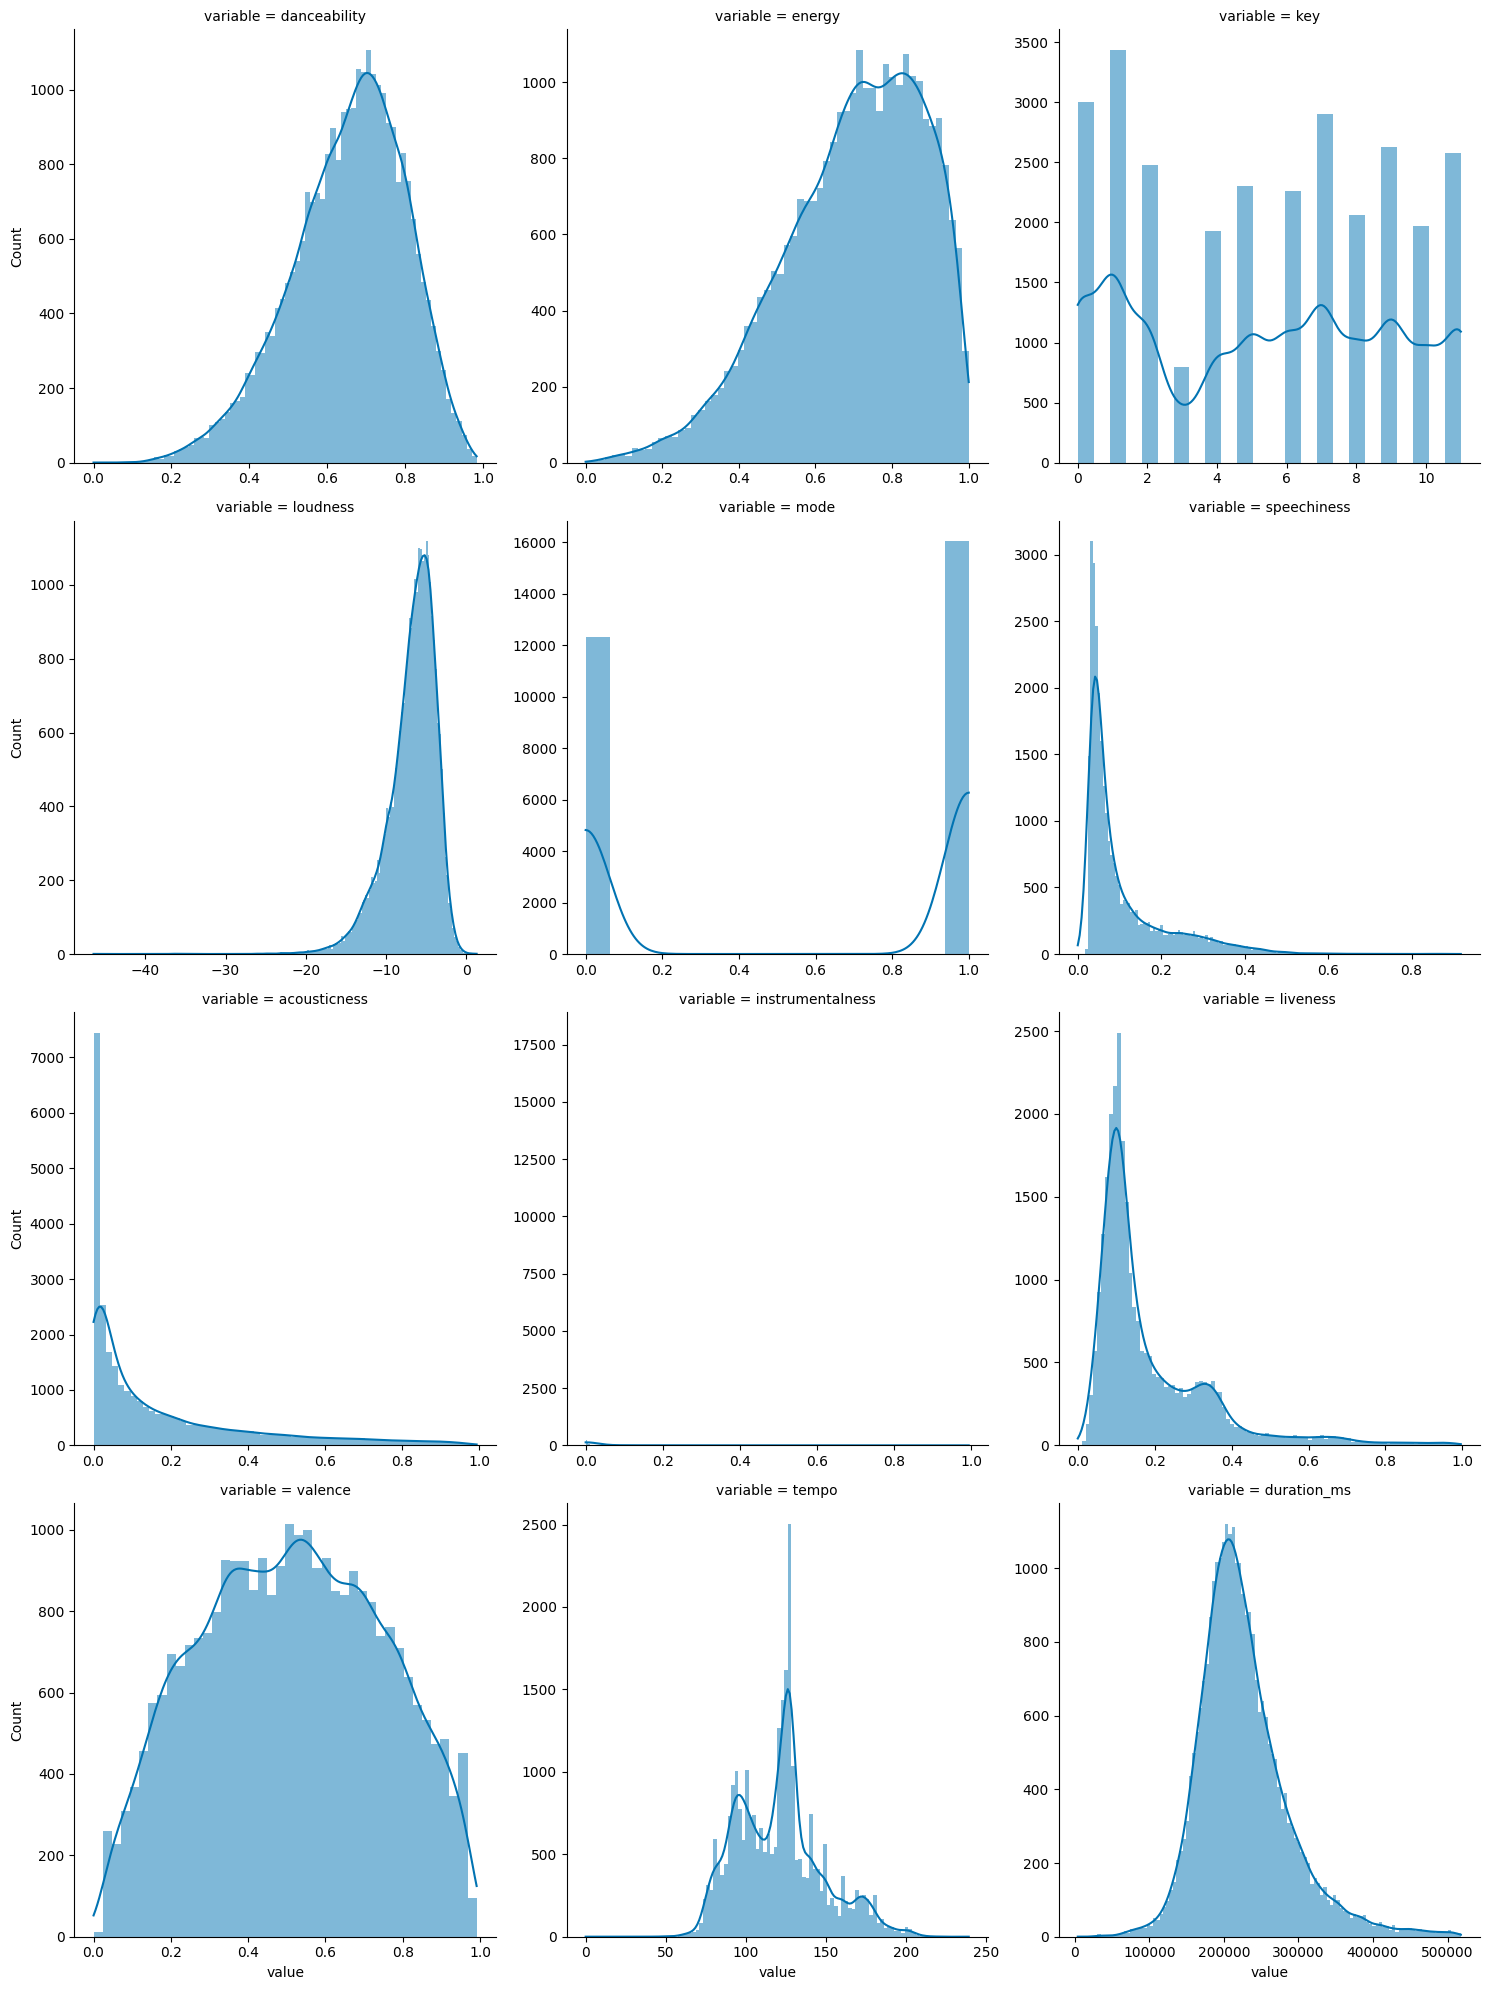

In [18]:
sns.displot(data = df_lf, x='value', col='variable', kind='hist', kde=True,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,
            col_wrap=3)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.tight_layout()
plt.show()

In [19]:
# Reducing skewness by applying log transform

df['speechiness_log'] = df['speechiness'].apply(lambda x: np.log(x) if x > 0 else 0)
df['acousticness_log'] = df['acousticness'].apply(lambda x: np.log(x) if x > 0 else 0)
df['instrumentalness_log'] = df['instrumentalness'].apply(lambda x: np.log(x) if x > 0 else 0)
df['liveness_log'] = df['liveness'].apply(lambda x: np.log(x) if x > 0 else 0)
df['duration_ms_log'] = df['duration_ms'].apply(lambda x: np.log(x) if x > 0 else 0)

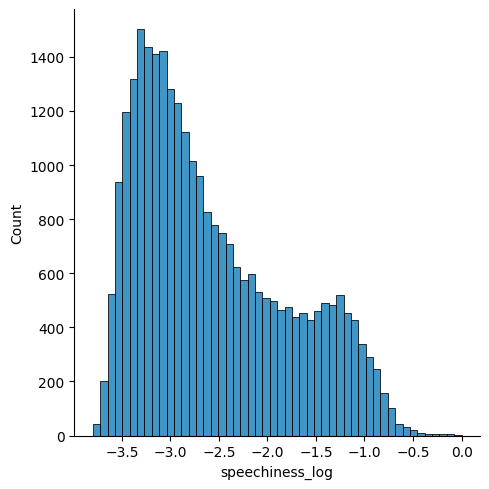

In [20]:
sns.displot(data = df, x='speechiness_log', kind='hist')

plt.show()

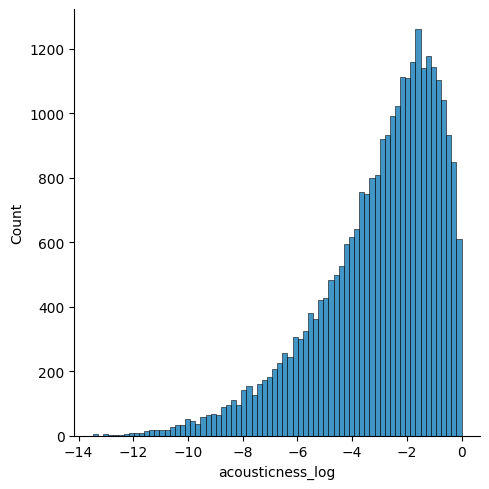

In [21]:
sns.displot(data = df, x='acousticness_log', kind='hist')

plt.show()

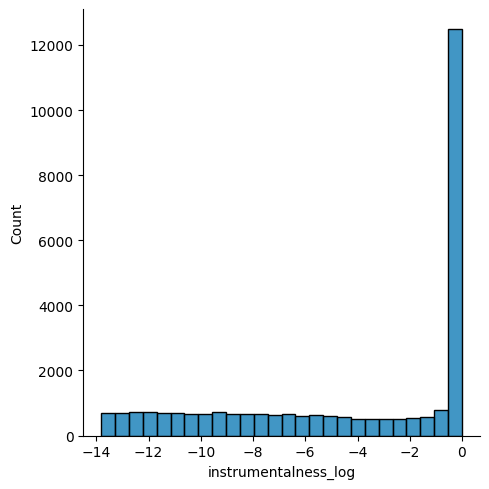

In [22]:
sns.displot(data = df, x='instrumentalness_log', kind='hist')

plt.show()

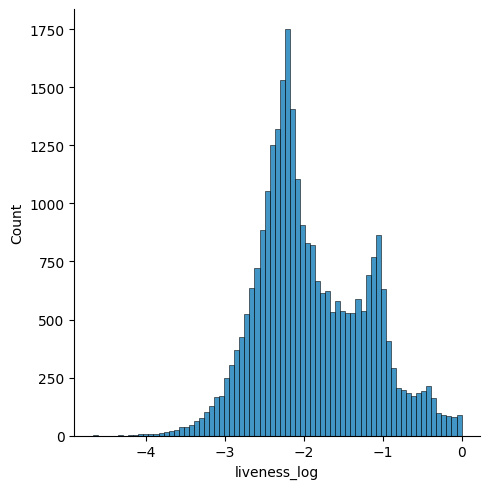

In [23]:
sns.displot(data = df, x='liveness_log', kind='hist')

plt.show()

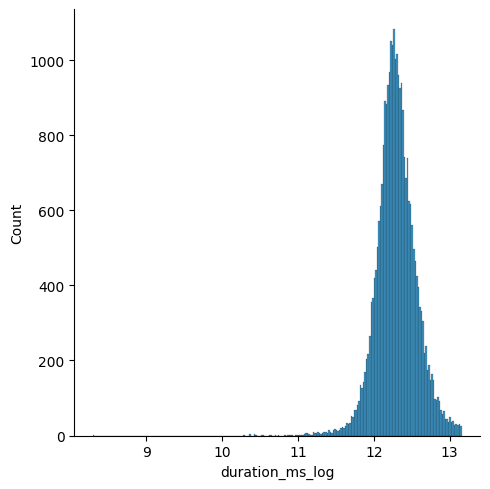

In [24]:
sns.displot(data = df, x='duration_ms_log', kind='hist')

plt.show()

## D. Models: Fitting and Interpretation 

### Fitting

Define a function to FIT and CALCULATE the training set performance

In [25]:
def fit_and_assess_logistic(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()

    train_copy = train_data.copy()

    train_copy['pred_probability'] = a_mod.predict(train_data)

    train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0 )

    TN, FP, FN, TP = confusion_matrix(train_copy.y.to_numpy(), train_copy.pred_class.to_numpy() ).ravel()

    Accuracy = (TN + TP) / (TN + FP + FN + TP)

    Sensitivity = (TP) / (TP + FN)

    Specificity = (TN) / (TN + FP)

    FPR = 1 - Specificity

    ROC_AUC = roc_auc_score(train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy() )

    res_dict = {'model_name': mod_name,
                'model_formula': a_formula,
                'num_coefs': len( a_mod.params ),
                'threshold': threshold,
                'Accuracy': Accuracy,
                'Sensitivity': Sensitivity,
                'Specificity': Specificity,
                'FPR': FPR,
                'ROC_AUC': ROC_AUC}

    return pd.DataFrame( res_dict, index=[0] )

In [26]:
df['y'] = df['track_popularity_bin']
df = df.astype({'y': 'int'})

In [45]:
df.drop(columns=['track_popularity_bin', 'track_popularity'], inplace=True)
df

playlist_genre  danceability  energy  key  loudness  mode  speechiness  \
0                pop         0.748   0.916    6    -2.634     1       0.0583   
1                pop         0.726   0.815   11    -4.969     1       0.0373   
2                pop         0.675   0.931    1    -3.432     0       0.0742   
3                pop         0.718   0.930    7    -3.778     1       0.1020   
4                pop         0.650   0.833    1    -4.672     1       0.0359   
...              ...           ...     ...  ...       ...   ...          ...   
32828            edm         0.428   0.922    2    -1.814     1       0.0936   
32829            edm         0.522   0.786    0    -4.462     1       0.0420   
32830            edm         0.529   0.821    6    -4.899     0       0.0481   
32831            edm         0.626   0.888    2    -3.361     1       0.1090   
32832            edm         0.603   0.884    5    -4.571     0       0.0385   

       acousticness  instrumentalness  liveness  valence    tempo  \
0          0.102000          0.000000    0.0653   0.5180  122.036   
1          0.072400          0.004210    0.3570   0.6930   99.972   
2          0.079400          0.000023    0.1100   0.6130  124.008   
3          0.028700          0.000009    0.2040   0.2770  121.956   
4          0.080300          0.000000    0.0833   0.7250  123.976   
...             ...               ...       ...      ...      ...   
32828      0.076600          0.000000    0.0668   0.2100  128.170   
32829      0.001710          0.004270    0.3750   0.4000  128.041   
32830      0.108000          0.000001    0.1500   0.4360  127.989   
32831      0.007920          0.127000    0.3430   0.3080  128.008   
32832      0.000133          0.341000    0.7420   0.0894  127.984   

       duration_ms  speechiness_log  acousticness_log  instrumentalness_log  \
0           194754        -2.842153         -2.282782              0.000000   
1           162600        -3.288762         -2.625549             -5.470293   
2           176616        -2.600991         -2.533257            -10.667057   
3           169093        -2.282782         -3.550858            -11.571614   
4           189052        -3.327018         -2.521986              0.000000   
...            ...              ...               ...                   ...   
32828       204375        -2.368725         -2.569158              0.000000   
32829       353120        -3.170086         -6.371262             -5.456141   
32830       210112        -3.034473         -2.225624            -13.711151   
32831       367432        -2.216407         -4.838364             -2.063568   
32832       337500        -3.257097         -8.925161             -1.075873   

       liveness_log  duration_ms_log  y  
0         -2.728763        12.179493  1  
1         -1.030019        11.999048  1  
2         -2.207275        12.081733  1  
3         -1.589635        12.038204  1  
4         -2.485307        12.149777  1  
...             ...              ... ..  
32828     -2.706052        12.227712  0  
32829     -0.980829        12.774563  0  
32830     -1.897120        12.255396  0  
32831     -1.070025        12.814294  0  
32832     -0.298406        12.729321  0  

[28356 rows x 19 columns]

In [46]:
fit_and_assess_logistic(0, 'y ~ 1', train_data=df, threshold=0.5)

Optimization terminated successfully.
         Current function value: 0.659223
         Iterations 4


model_name model_formula  num_coefs  threshold  Accuracy  Sensitivity  \
0           0         y ~ 1          1        0.5  0.629496          0.0   

   Specificity  FPR  ROC_AUC  
0          1.0  0.0      0.5

In [47]:
formula_list = [
    # Intercept Only
    'y ~ 1',
    # Categorical inputs with additive features
    'y ~ playlist_genre + key + mode',
    # Continuous inputs with linear additive features
    'y ~ tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log',
    # All Inputs
    'y ~ playlist_genre + key + mode + tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log',
    # Continuous inputs with linear main effect and pair-wise interactions.
    'y ~ (tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log) ** 2',
    # Interact the categorical inputs with the continuous inputs. This model must include the linear main effects as well (the formula interface helps with the interactions).
    'y ~ playlist_genre * (tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log)',
    # Based on EDA
    'y ~ mode * (tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log)',
    'y ~ playlist_genre * ( (tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log)**2 + np.power(tempo,2) + np.power(loudness,2) + np.power(valence,2) + np.power(danceability,2) + np.power(energy,2) + np.power(duration_ms_log,2) + np.power(speechiness_log,2) + np.power(instrumentalness_log,2) + np.power(liveness_log,2) + np.power(acousticness_log,2))',
]


In [202]:
mod0 = smf.logit(formula = formula_list[0], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.659223
         Iterations 4


In [195]:
mod1 = smf.logit(formula = formula_list[1], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.635441
         Iterations 5


In [196]:
mod2 = smf.logit(formula = formula_list[2], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.642106
         Iterations 5


In [197]:
mod3 = smf.logit(formula = formula_list[3], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.620351
         Iterations 6


In [198]:
mod4 = smf.logit(formula = formula_list[4], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.633988
         Iterations 6


In [199]:
mod5 = smf.logit(formula = formula_list[5], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.612935
         Iterations 7


In [200]:
mod6 = smf.logit(formula = formula_list[6], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.641314
         Iterations 5


In [201]:
mod7 = smf.logit(formula = formula_list[7], data = df).fit()

Optimization terminated successfully.
         Current function value: 0.597308
         Iterations 15


In [48]:
results_list=[]
for x in range(len(formula_list)):
    results_list.append(
        fit_and_assess_logistic(x, formula_list[x], train_data = df, threshold=0.5) )

Optimization terminated successfully.
         Current function value: 0.659223
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635441
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620351
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633988
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.641314
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597308
         Iterations 15


In [49]:
results_df = pd.concat(results_list, ignore_index=True)
results_df

model_name                                      model_formula  num_coefs  \
0           0                                              y ~ 1          1   
1           1                    y ~ playlist_genre + key + mode          8   
2           2  y ~ tempo + loudness + valence + danceability ...         11   
3           3  y ~ playlist_genre + key + mode + tempo + loud...         18   
4           4  y ~ (tempo + loudness + valence + danceability...         56   
5           5  y ~ playlist_genre * (tempo + loudness + valen...         66   
6           6  y ~ mode * (tempo + loudness + valence + dance...         22   
7           7  y ~ playlist_genre * ( (tempo + loudness + val...        396   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
0        0.5  0.629496     0.000000     1.000000  0.000000  0.500000  
1        0.5  0.629496     0.000000     1.000000  0.000000  0.614164  
2        0.5  0.631471     0.094993     0.947227  0.052773  0.611263  
3        0.5  0.645013     0.246907     0.879328  0.120672  0.661755  
4        0.5  0.638489     0.138778     0.932605  0.067395  0.629157  
5        0.5  0.657215     0.283267     0.877311  0.122689  0.677108  
6        0.5  0.632741     0.103560     0.944202  0.055798  0.613896  
7        0.5  0.669453     0.360937     0.851036  0.148964  0.701659

In [50]:
results_df.sort_values(by=['Accuracy'], ascending=False)

model_name                                      model_formula  num_coefs  \
7           7  y ~ playlist_genre * ( (tempo + loudness + val...        396   
5           5  y ~ playlist_genre * (tempo + loudness + valen...         66   
3           3  y ~ playlist_genre + key + mode + tempo + loud...         18   
4           4  y ~ (tempo + loudness + valence + danceability...         56   
6           6  y ~ mode * (tempo + loudness + valence + dance...         22   
2           2  y ~ tempo + loudness + valence + danceability ...         11   
0           0                                              y ~ 1          1   
1           1                    y ~ playlist_genre + key + mode          8   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
7        0.5  0.669453     0.360937     0.851036  0.148964  0.701659  
5        0.5  0.657215     0.283267     0.877311  0.122689  0.677108  
3        0.5  0.645013     0.246907     0.879328  0.120672  0.661755  
4        0.5  0.638489     0.138778     0.932605  0.067395  0.629157  
6        0.5  0.632741     0.103560     0.944202  0.055798  0.613896  
2        0.5  0.631471     0.094993     0.947227  0.052773  0.611263  
0        0.5  0.629496     0.000000     1.000000  0.000000  0.500000  
1        0.5  0.629496     0.000000     1.000000  0.000000  0.614164

In [51]:
results_df.sort_values(by=['ROC_AUC'], ascending=False)

model_name                                      model_formula  num_coefs  \
7           7  y ~ playlist_genre * ( (tempo + loudness + val...        396   
5           5  y ~ playlist_genre * (tempo + loudness + valen...         66   
3           3  y ~ playlist_genre + key + mode + tempo + loud...         18   
4           4  y ~ (tempo + loudness + valence + danceability...         56   
1           1                    y ~ playlist_genre + key + mode          8   
6           6  y ~ mode * (tempo + loudness + valence + dance...         22   
2           2  y ~ tempo + loudness + valence + danceability ...         11   
0           0                                              y ~ 1          1   

   threshold  Accuracy  Sensitivity  Specificity       FPR   ROC_AUC  
7        0.5  0.669453     0.360937     0.851036  0.148964  0.701659  
5        0.5  0.657215     0.283267     0.877311  0.122689  0.677108  
3        0.5  0.645013     0.246907     0.879328  0.120672  0.661755  
4        0.5  0.638489     0.138778     0.932605  0.067395  0.629157  
1        0.5  0.629496     0.000000     1.000000  0.000000  0.614164  
6        0.5  0.632741     0.103560     0.944202  0.055798  0.613896  
2        0.5  0.631471     0.094993     0.947227  0.052773  0.611263  
0        0.5  0.629496     0.000000     1.000000  0.000000  0.500000

### Interpretation

In [203]:
def my_coefplot(mod, figsize_use=(10,14)):
    fig, ax = plt.subplots(figsize = figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

In [204]:
models = [mod0, mod1, mod2, mod3, mod4, mod5, mod6, mod7]

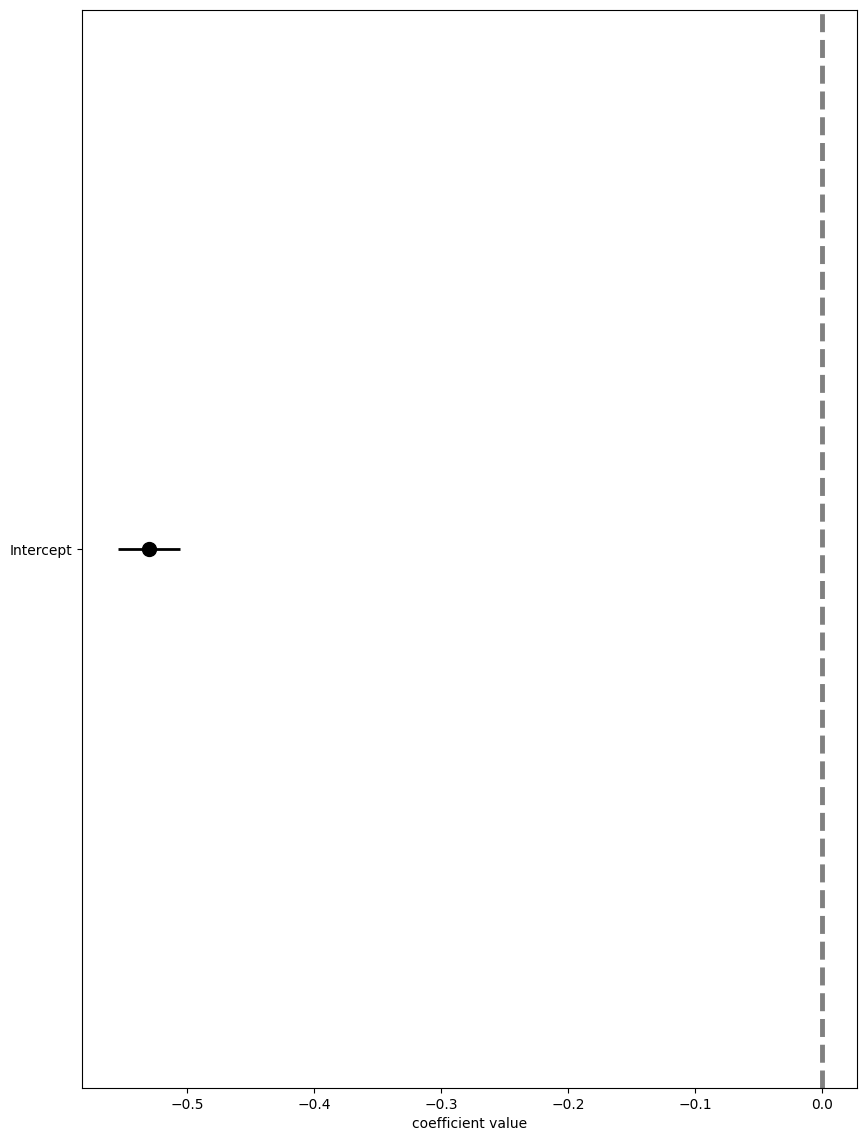

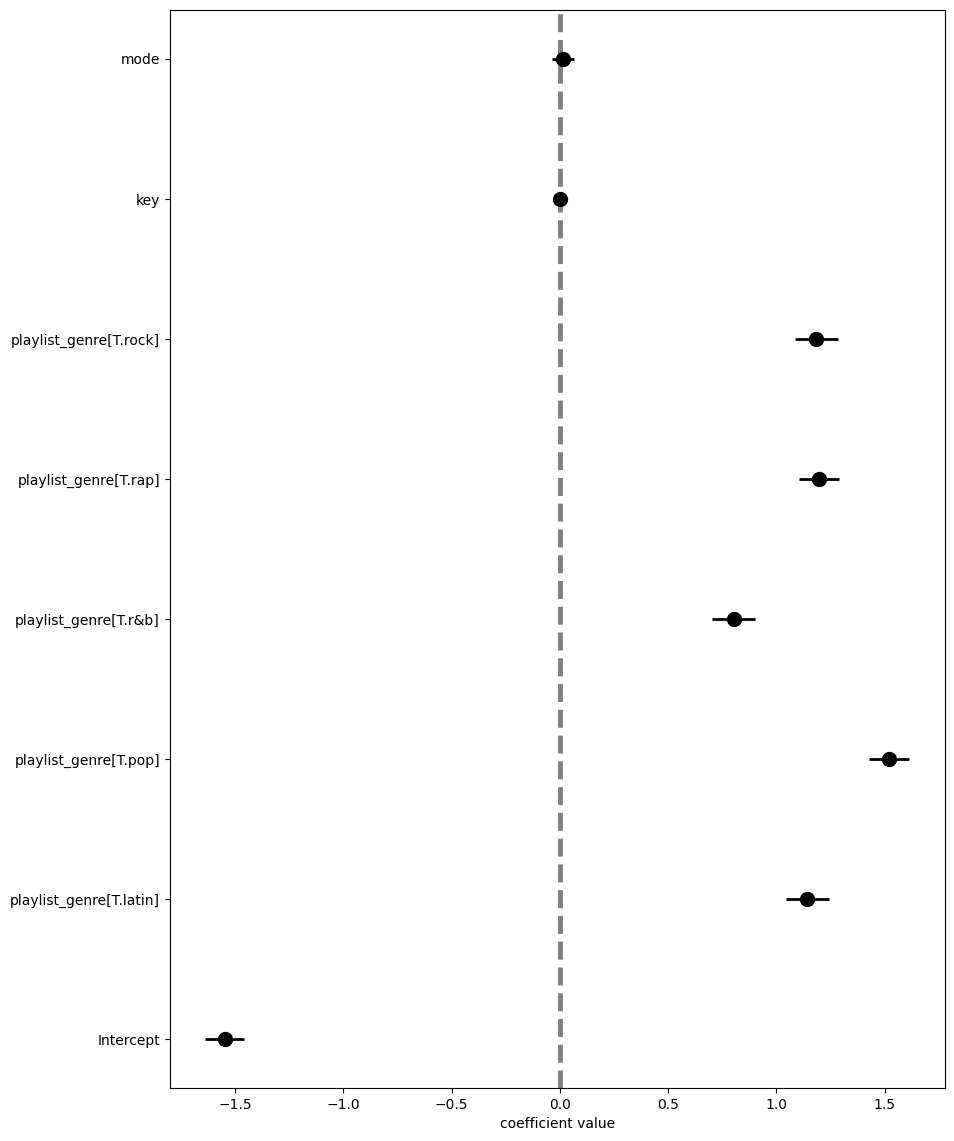

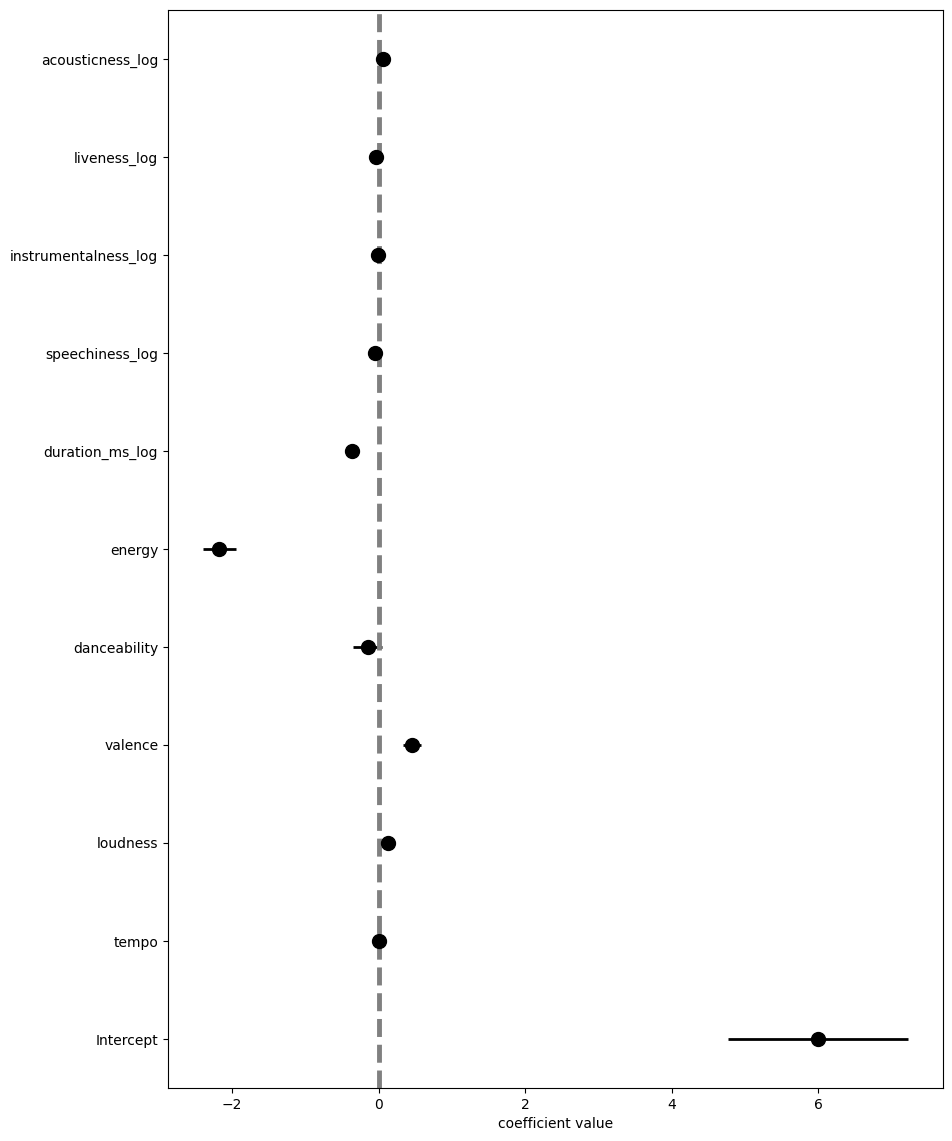

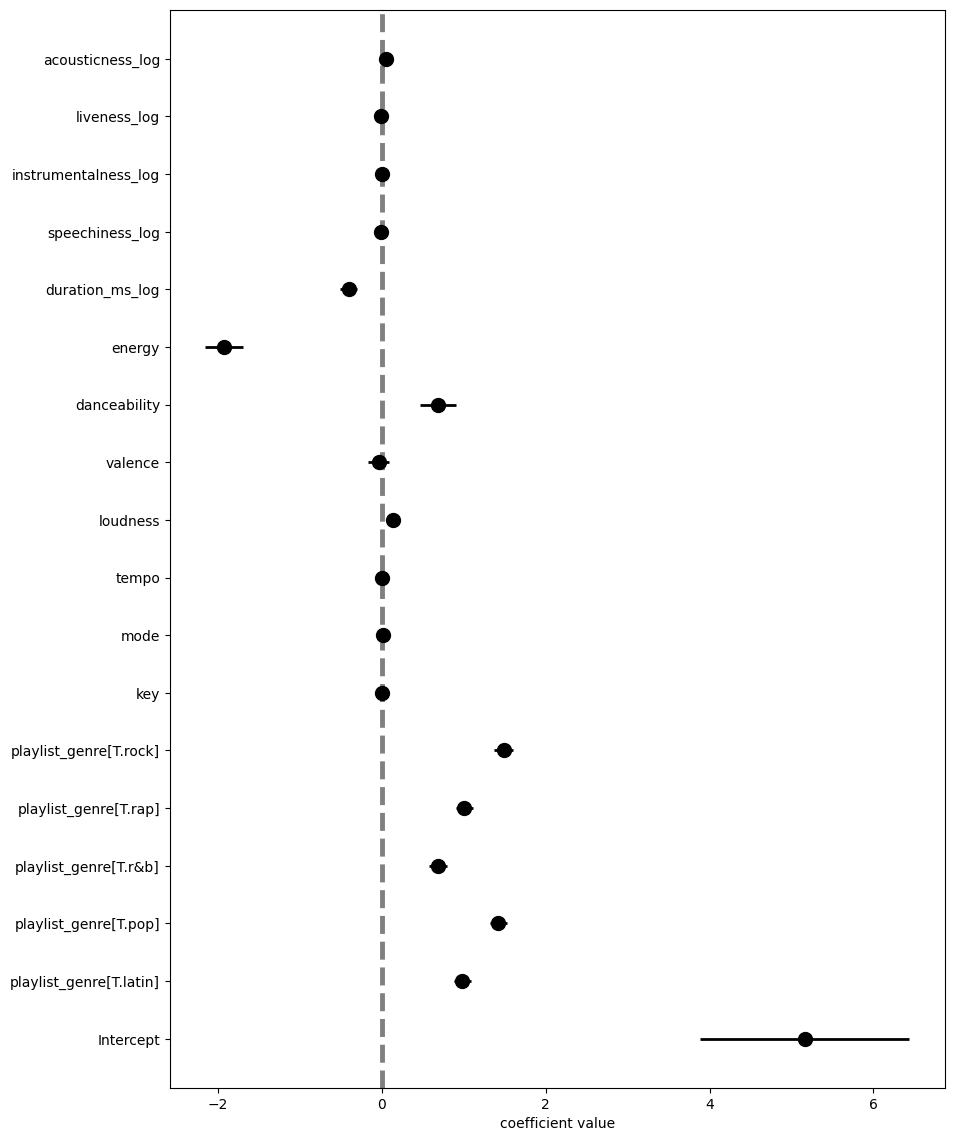

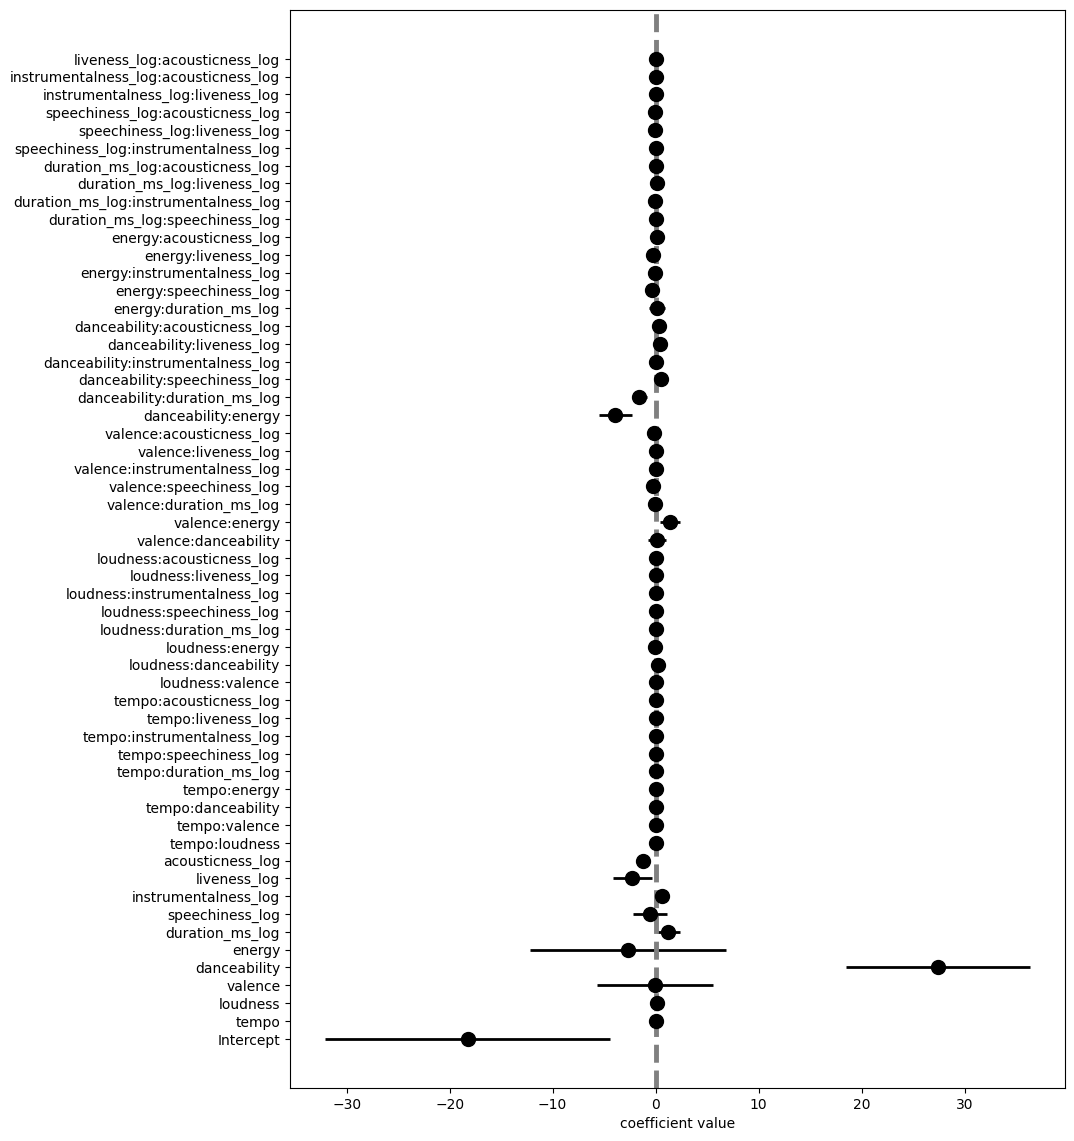

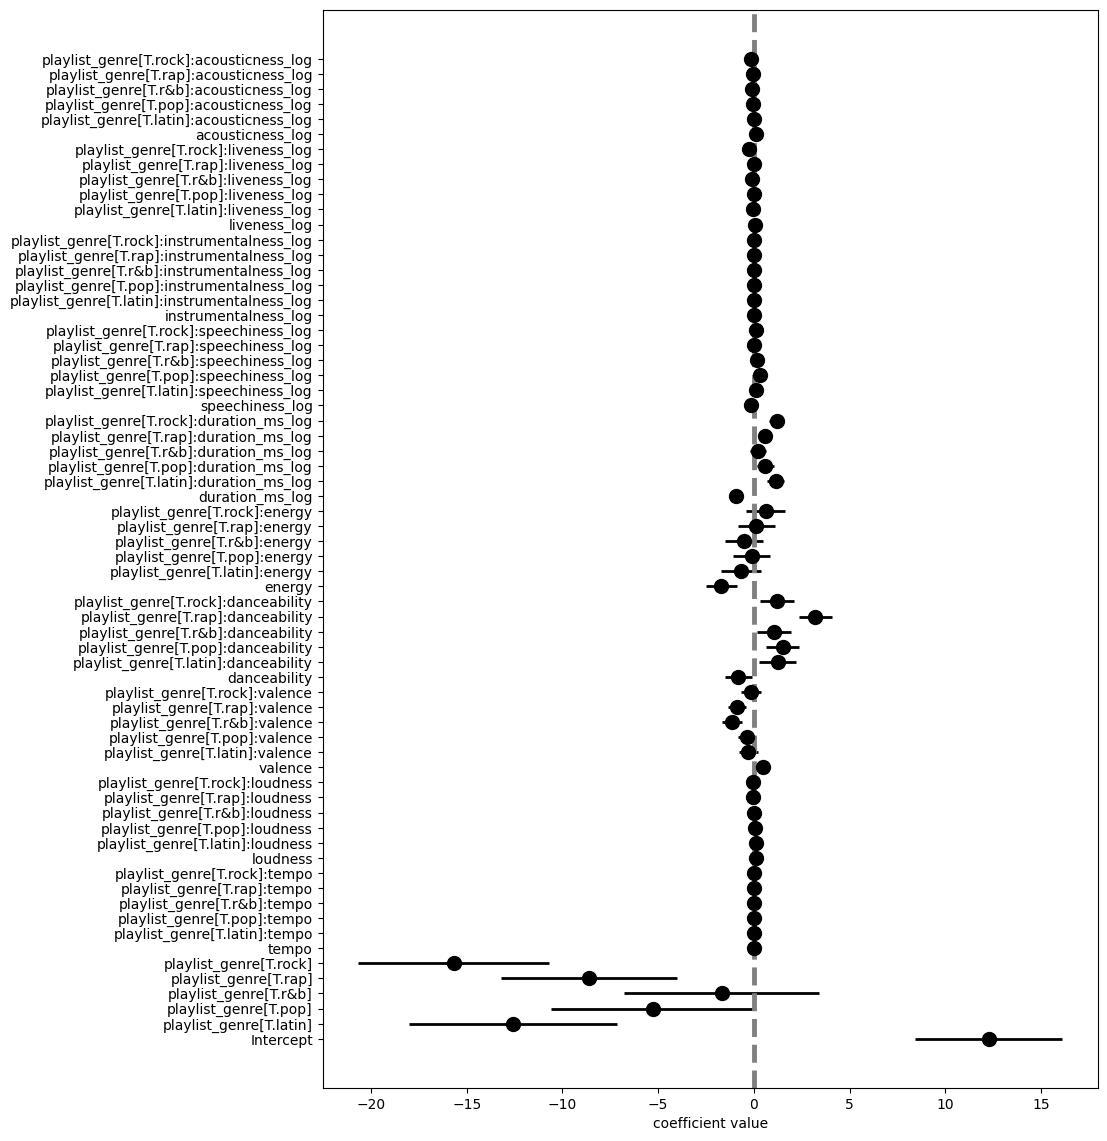

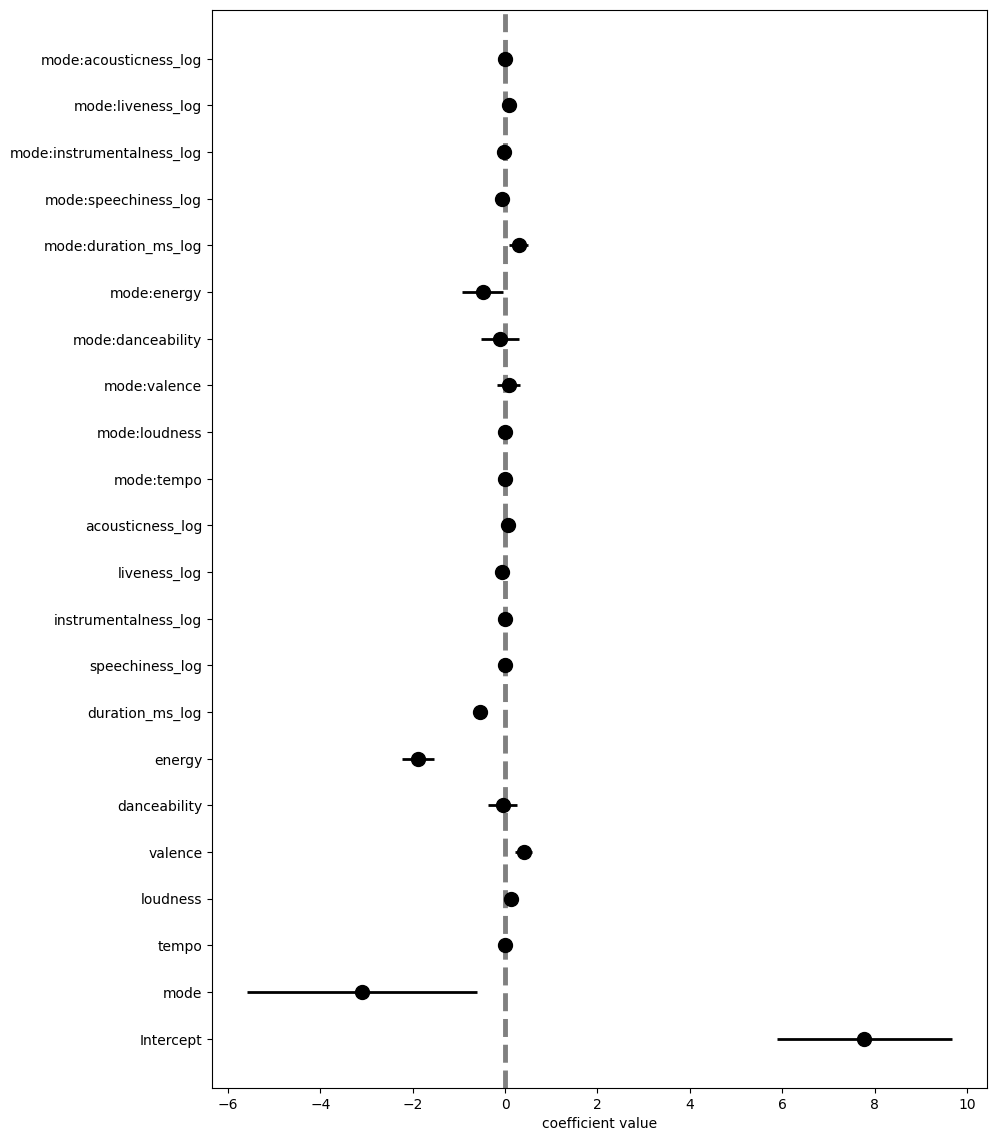

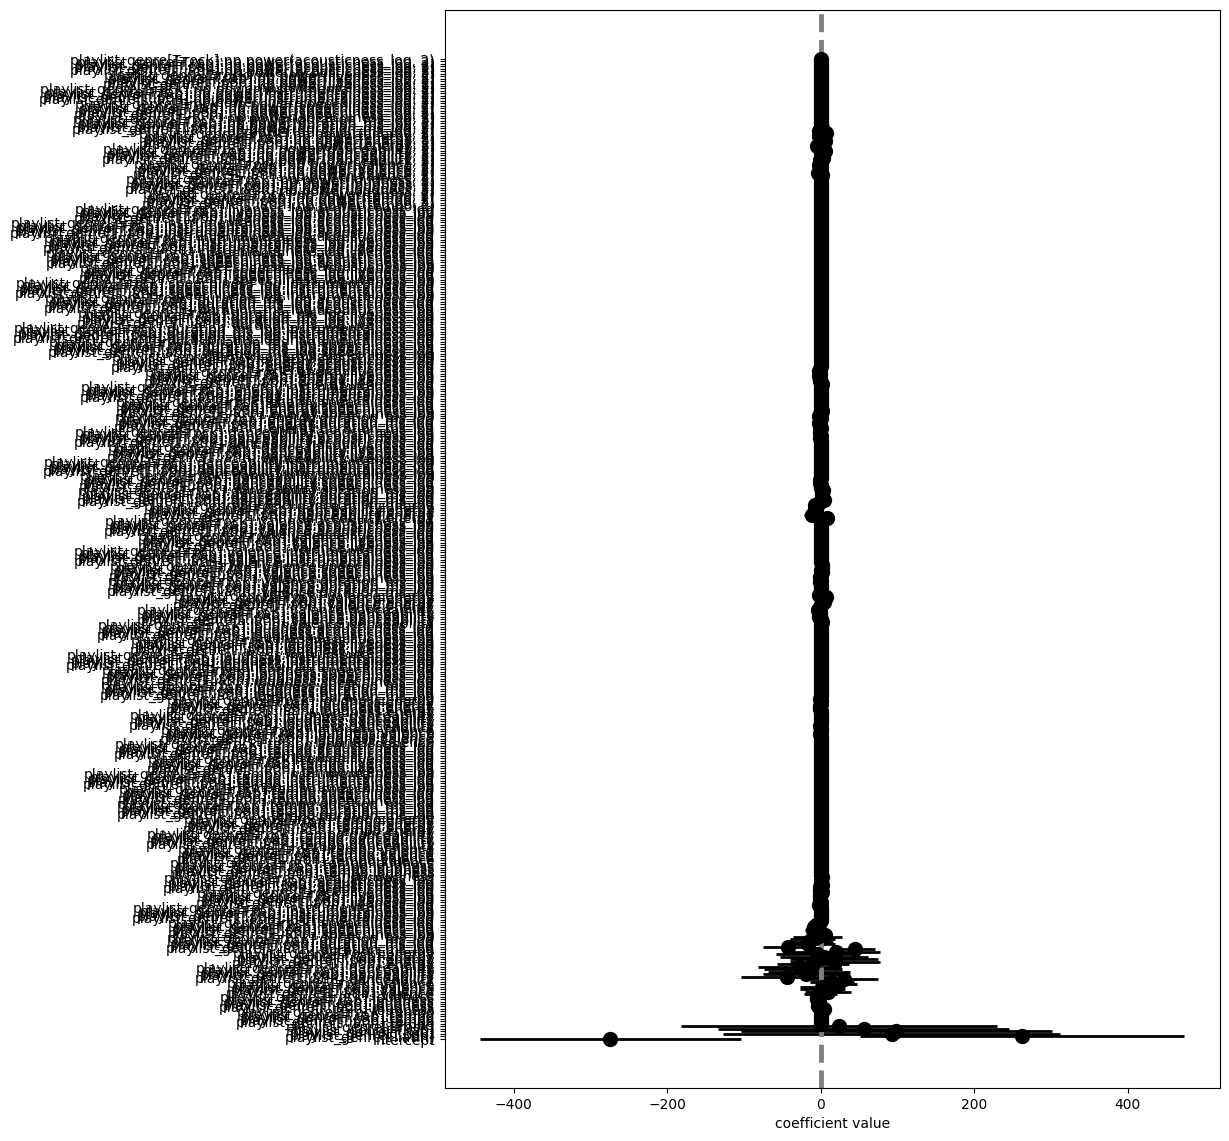

In [205]:
for m in models:
    my_coefplot(m)

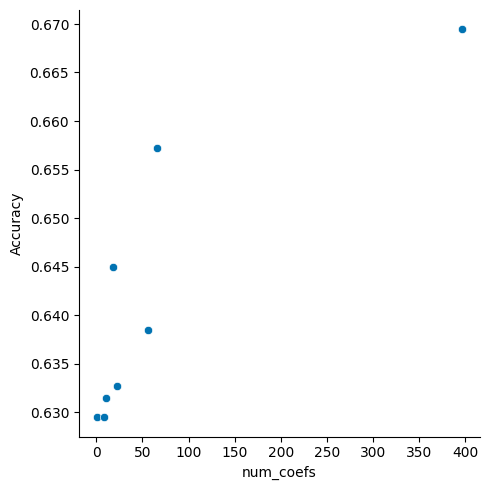

In [52]:
sns.relplot(data = results_df, x='num_coefs', y='Accuracy', kind='scatter')

plt.show()

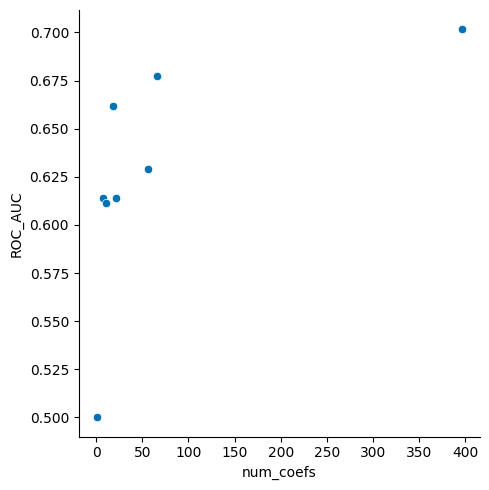

In [53]:
sns.relplot(data = results_df, x='num_coefs', y='ROC_AUC', kind='scatter')

plt.show()

Model performance gets better with more coefficients

#### Best Performing Model
* **model_name**: 7
* **model_formula**: `y ~ playlist_genre * ( (tempo + loudness + valence + danceability + energy + duration_ms_log + speechiness_log + instrumentalness_log + liveness_log + acousticness_log)**2 + np.power(tempo,2) + np.power(loudness,2) + np.power(valence,2) + np.power(danceability,2) + np.power(energy,2) + np.power(duration_ms_log,2) + np.power(speechiness_log,2) +                np.power(instrumentalness_log,2) + np.power(liveness_log,2) + np.power(acousticness_log,2))`
* **Accuracy Vs ROC** - In this case the model doesn't change between Accuracy Vs ROC. It is still model 7
* **No. of coefs**: 396
* The best model performs **better** than INTERCEPT-ONLY model

#### Visualize the entire ROC curve for each model

In [54]:
def fit_logistic_make_roc(mod_name, a_formula, train_data):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()
    
    train_copy = train_data.copy()
    
    train_copy['pred_probability'] = a_mod.predict( train_data )
    
    fpr, tpr, threshold = roc_curve( train_data.y.to_numpy(), train_copy.pred_probability.to_numpy() )
    
    res_df = pd.DataFrame({'tpr': tpr,
                           'fpr': fpr,
                           'threshold': threshold})
    
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    
    return res_df

In [56]:
roc_list = []

for m in range( len(formula_list) ):
    roc_list.append( fit_logistic_make_roc( m, formula_list[m], train_data=df))

Optimization terminated successfully.
         Current function value: 0.659223
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635441
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620351
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633988
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.641314
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597308
         Iterations 15


In [57]:
roc_df = pd.concat( roc_list, ignore_index=True )
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75759 entries, 0 to 75758
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tpr            75759 non-null  float64
 1   fpr            75759 non-null  float64
 2   threshold      75759 non-null  float64
 3   model_name     75759 non-null  int64  
 4   model_formula  75759 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.9+ MB


In [58]:
roc_df['model_name'] = roc_df.model_name.astype('category')
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75759 entries, 0 to 75758
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tpr            75759 non-null  float64 
 1   fpr            75759 non-null  float64 
 2   threshold      75759 non-null  float64 
 3   model_name     75759 non-null  category
 4   model_formula  75759 non-null  object  
dtypes: category(1), float64(3), object(1)
memory usage: 2.4+ MB


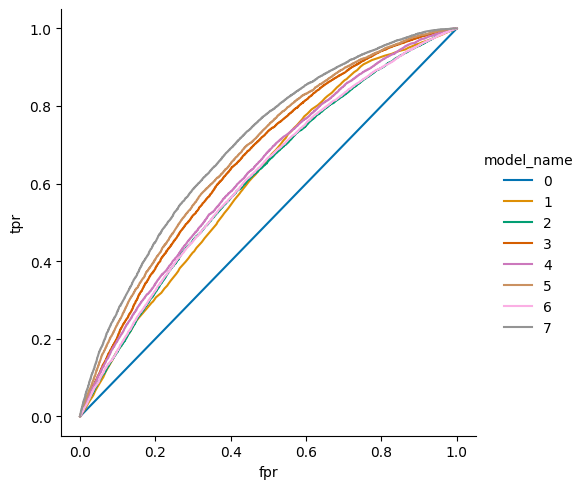

In [74]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None,)

plt.show()

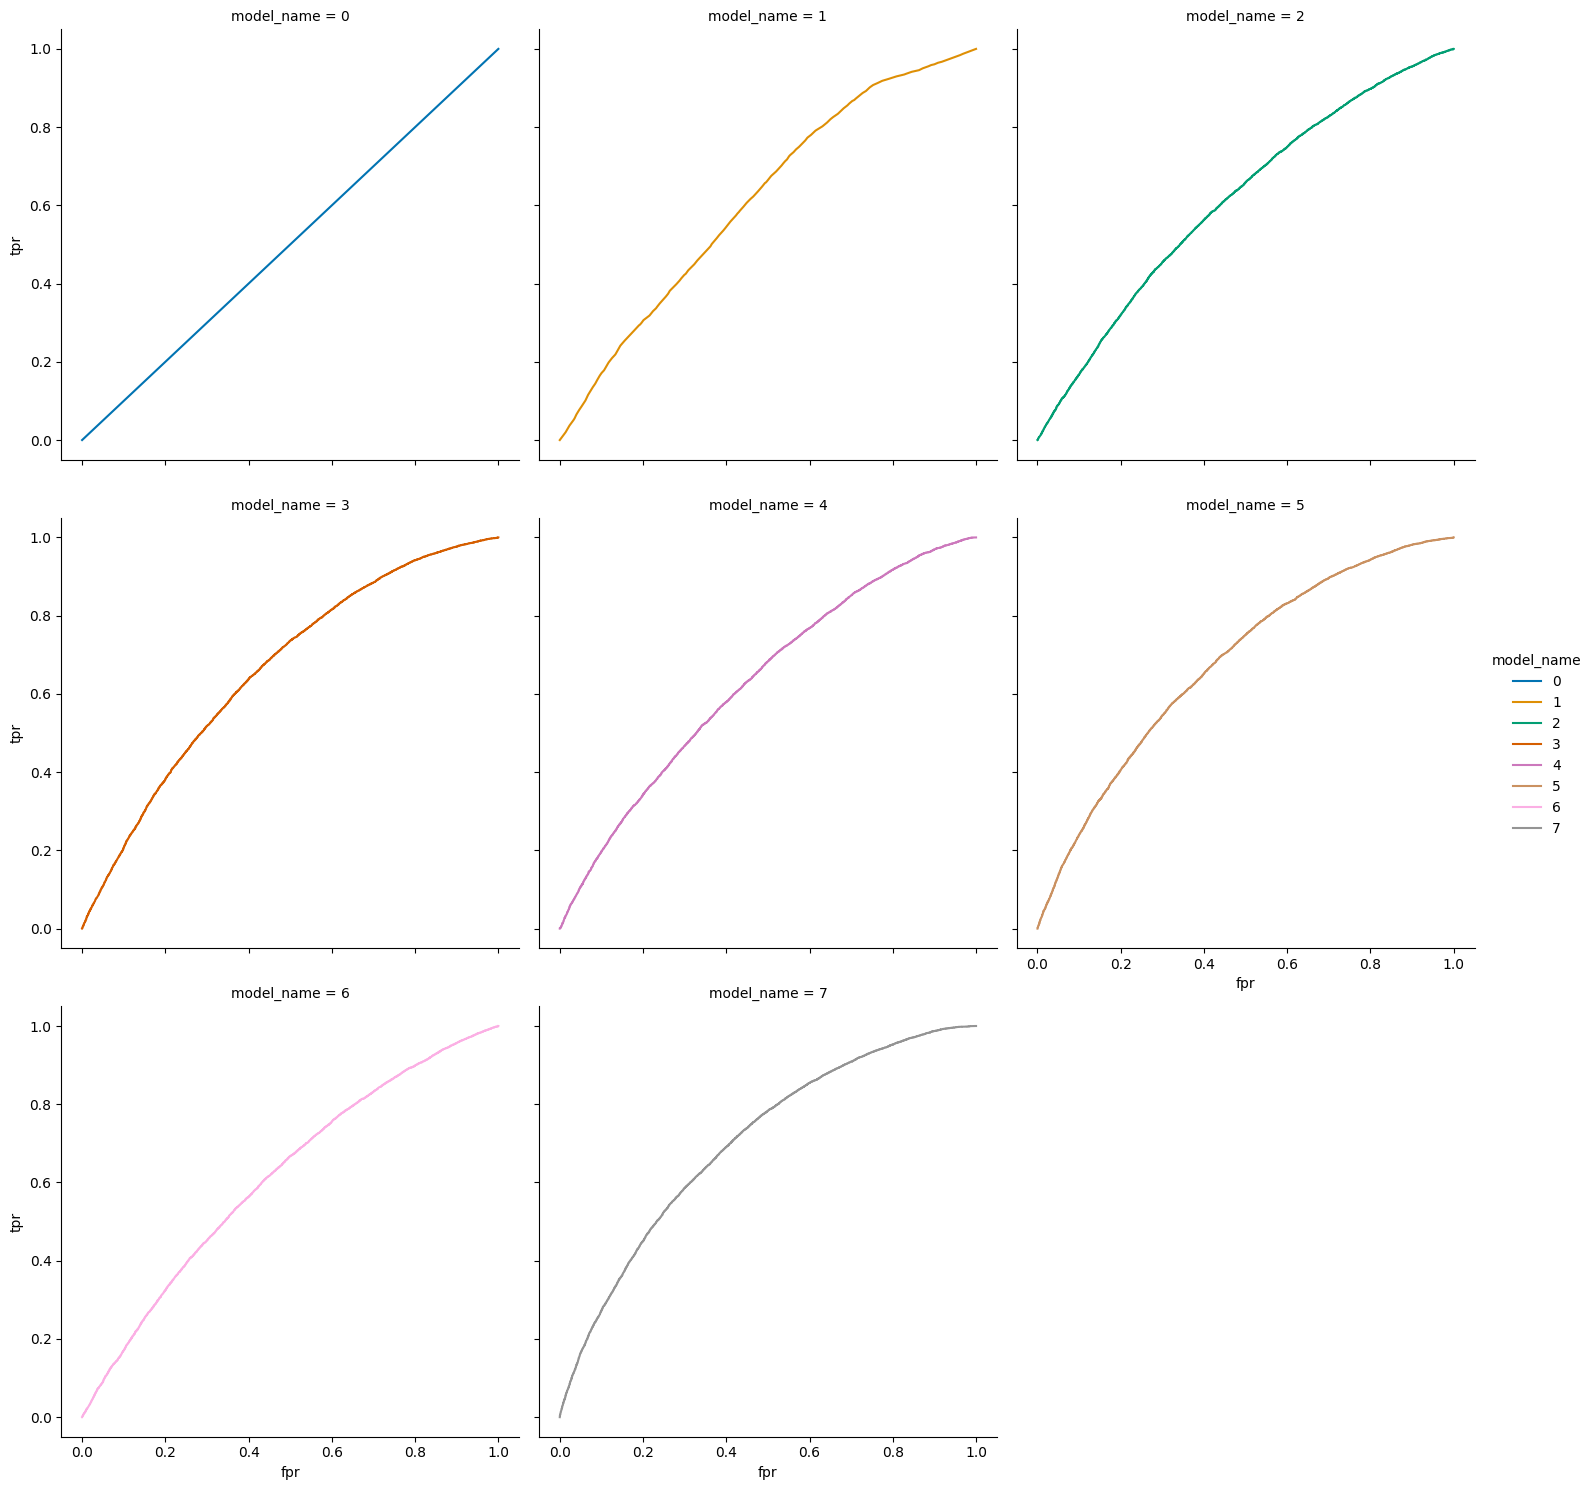

In [126]:
sns.relplot(data = roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None, col='model_name', col_wrap=3)

plt.show()

#### Identifying statistically significant features

In [62]:
# Model with all features
model_all_feat = smf.logit(formula=formula_list[3], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.620351
         Iterations 6


In [88]:
print(model_all_feat.pvalues[model_all_feat.pvalues < 0.05].sort_values().to_string())

playlist_genre[T.pop]      2.617667e-184
playlist_genre[T.rock]     1.223407e-158
loudness                   5.572640e-108
playlist_genre[T.rap]       3.086667e-84
playlist_genre[T.latin]     5.867846e-78
energy                      3.397391e-60
playlist_genre[T.r&b]       2.052120e-35
Intercept                   6.860019e-16
acousticness_log            1.010851e-15
duration_ms_log             3.554137e-15
danceability                3.869361e-10
tempo                       1.036601e-06


In [76]:
# Best performing model
model_best = smf.logit(formula=formula_list[7], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.597308
         Iterations 15


In [87]:
print(model_best.pvalues[model_best.pvalues < 0.05].sort_values().to_string())

playlist_genre[T.pop]:tempo:speechiness_log                 0.000038
playlist_genre[T.rap]:tempo:speechiness_log                 0.000046
playlist_genre[T.latin]:tempo:speechiness_log               0.000074
playlist_genre[T.pop]:np.power(loudness, 2)                 0.000110
playlist_genre[T.r&b]:tempo:speechiness_log                 0.000139
playlist_genre[T.rock]:danceability:instrumentalness_log    0.000164
tempo:speechiness_log                                       0.000210
duration_ms_log                                             0.000693
valence:instrumentalness_log                                0.000765
np.power(duration_ms_log, 2)                                0.000943
playlist_genre[T.rock]:tempo:valence                        0.001122
Intercept                                                   0.001265
playlist_genre[T.latin]:valence:instrumentalness_log        0.001375
playlist_genre[T.rock]:loudness:duration_ms_log             0.001454
loudness:duration_ms_log          

In [111]:
# Second best performing model
model_5 = smf.logit(formula=formula_list[5], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.612935
         Iterations 7


In [112]:
print(model_5.pvalues[model_5.pvalues < 0.05].sort_values().to_string())

playlist_genre[T.rap]:danceability         4.200215e-14
Intercept                                  1.643470e-10
playlist_genre[T.rock]                     3.455261e-10
duration_ms_log                            8.318247e-10
playlist_genre[T.rock]:duration_ms_log     1.990475e-09
loudness                                   4.648723e-08
acousticness_log                           5.502261e-08
playlist_genre[T.rock]:acousticness_log    1.567145e-07
playlist_genre[T.latin]:duration_ms_log    1.896423e-07
playlist_genre[T.latin]                    3.817529e-06
playlist_genre[T.r&b]:valence              9.812608e-06
energy                                     2.493741e-05
playlist_genre[T.pop]:speechiness_log      1.232495e-04
playlist_genre[T.rap]                      1.789994e-04
playlist_genre[T.rap]:valence              2.230364e-04
playlist_genre[T.pop]:danceability         5.309010e-04
playlist_genre[T.rock]:liveness_log        7.486233e-04
playlist_genre[T.rap]:duration_ms_log      1.480

🛸 **loudness, duration_ms_log, playlist_genre** are the significant features

## E. Models: Predictions

In [92]:
df.describe(include=object)

playlist_genre
count           28356
unique              6
top               rap
freq             5401

In [93]:
df.describe()

danceability        energy           key      loudness          mode  \
count  28356.000000  28356.000000  28356.000000  28356.000000  28356.000000   
mean       0.653372      0.698388      5.368000     -6.817696      0.565489   
std        0.145785      0.183503      3.613904      3.036243      0.495701   
min        0.000000      0.000175      0.000000    -46.448000      0.000000   
25%        0.561000      0.579000      2.000000     -8.309250      0.000000   
50%        0.670000      0.722000      6.000000     -6.261000      1.000000   
75%        0.760000      0.843000      9.000000     -4.709000      1.000000   
max        0.983000      1.000000     11.000000      1.275000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  28356.000000  28356.000000      28356.000000  28356.000000   
mean       0.107954      0.177176          0.091117      0.190958   
std        0.102556      0.222803          0.232548      0.155894   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.041000      0.014375          0.000000      0.092600   
50%        0.062600      0.079700          0.000021      0.127000   
75%        0.133000      0.260000          0.006570      0.249000   
max        0.918000      0.994000          0.994000      0.996000   

            valence        tempo    duration_ms  speechiness_log  \
count  28356.000000  28356.00000   28356.000000     28356.000000   
mean       0.510387    120.95618  226575.967026        -2.562168   
std        0.234340     26.95456   61078.450819         0.775959   
min        0.000000      0.00000    4000.000000        -3.798694   
25%        0.329000     99.97200  187742.000000        -3.194183   
50%        0.512000    121.99300  216933.000000        -2.770990   
75%        0.695000    133.99900  254975.250000        -2.017406   
max        0.991000    239.44000  517810.000000         0.000000   

       acousticness_log  instrumentalness_log  liveness_log  duration_ms_log  \
count      28356.000000          28356.000000  28356.000000     28356.000000   
mean          -3.044614             -4.198872     -1.908728        12.296231   
std            2.225113              4.681524      0.688639         0.264864   
min          -13.479038            -13.815511     -4.671310         8.294050   
25%           -4.240527             -8.381789     -2.379466        12.142824   
50%           -2.529486             -1.937942     -2.063568        12.287344   
75%           -1.347074              0.000000     -1.390302        12.448922   
max            0.000000              0.000000      0.000000        13.157364   

                  y  
count  28356.000000  
mean       0.370504  
std        0.482948  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [105]:
input_grid = pd.DataFrame([(playlist_genre, danceability, energy, key, loudness, mode, valence, tempo, speechiness_log, acousticness_log, instrumentalness_log, liveness_log, duration_ms_log) 
                           for playlist_genre in df.playlist_genre.unique()
                           for danceability in [df.danceability.mean()]
                           for energy in [df.energy.mean()]
                           for key in df.key.mode()
                           for loudness in np.linspace(df.loudness.min(), df.loudness.max(), num=5)
                           for mode in df['mode'].mode()
                           for valence in [df.valence.mean()]
                           for tempo in [df.tempo.mean()]
                           for speechiness_log in [df.speechiness_log.mean()]
                           for acousticness_log in [df.acousticness_log.mean()]
                           for instrumentalness_log in [df.instrumentalness_log.mean()]
                           for liveness_log in [df.liveness_log.mean()]
                           for duration_ms_log in np.linspace(df.duration_ms_log.min(), df.duration_ms_log.max(), num=101)
                          ],
                          columns=['playlist_genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'valence', 'tempo', 'speechiness_log', 'acousticness_log', 'instrumentalness_log', 'liveness_log', 'duration_ms_log'])

In [108]:
input_grid.nunique()

playlist_genre            6
danceability              1
energy                    1
key                       1
loudness                  5
mode                      1
valence                   1
tempo                     1
speechiness_log           1
acousticness_log          1
instrumentalness_log      1
liveness_log              1
duration_ms_log         101
dtype: int64

In [118]:
dfviz = input_grid.copy()

In [119]:
dfviz['pred_probability_all'] = model_all_feat.predict(input_grid)

In [120]:
dfviz['pred_probability_best'] = model_best.predict(input_grid)

In [121]:
dfviz['pred_probability_5'] = model_5.predict(input_grid)

### Visualize predict probability using the formula with ALL features

#### Plot

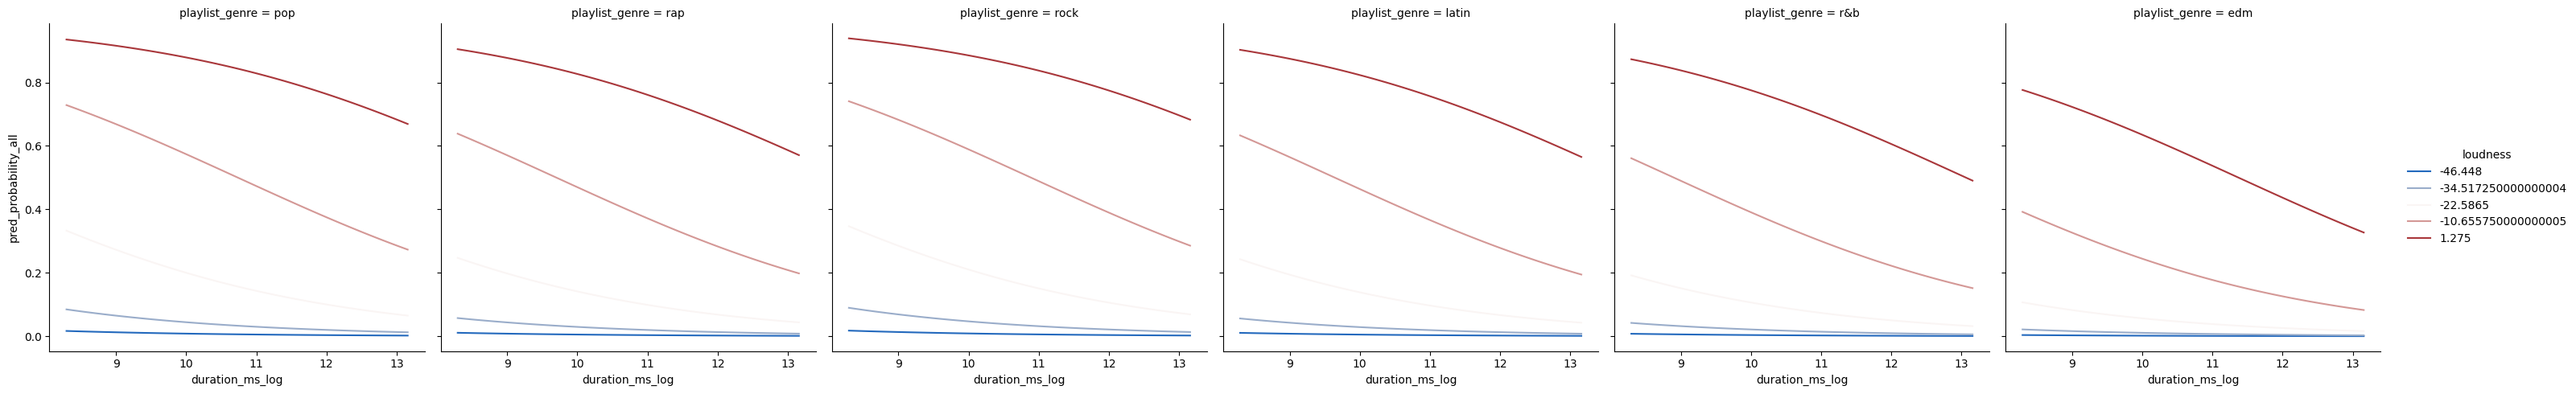

In [139]:
g = sns.relplot(data = dfviz, x='duration_ms_log', y='pred_probability_all', 
                hue='loudness', 
                col='playlist_genre',
                kind='line', 
                palette='vlag', estimator=None, units='loudness')

plt.show()

In [127]:
model_all_feat.pvalues < 0.05

Intercept                   True
playlist_genre[T.latin]     True
playlist_genre[T.pop]       True
playlist_genre[T.r&b]       True
playlist_genre[T.rap]       True
playlist_genre[T.rock]      True
key                        False
mode                       False
tempo                       True
loudness                    True
valence                    False
danceability                True
energy                      True
duration_ms_log             True
speechiness_log            False
instrumentalness_log       False
liveness_log               False
acousticness_log            True
dtype: bool

#### Interpretation
👉 The above plot shows that regardless of genre shorter and louder songs tend to be more popular

### Visualize predict probability using the BEST model

#### Plot

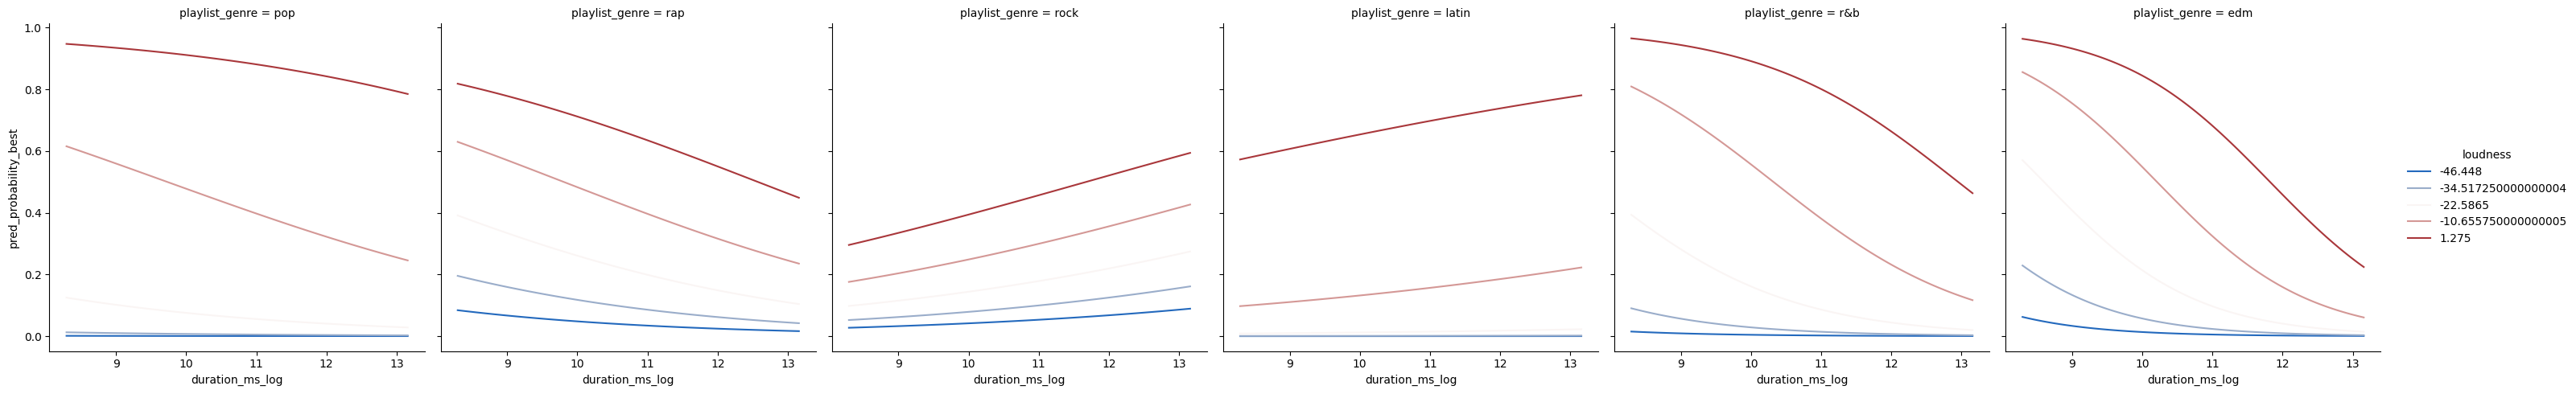

In [138]:
g= sns.relplot(data = dfviz, x='duration_ms_log', y='pred_probability_best', 
               hue='loudness', 
               col='playlist_genre',
               kind='line', 
               palette='vlag', estimator=None, units='loudness')

plt.show()

#### Interpretation

👉 Predicted Probability depends on both `loudness` and `duration_ms`

👉 Loudness consistently boosts predicted probability

👉 The effect of duration on predicted probability differs based on genre

### Visualize predict probability using the Second Best model

#### Plot

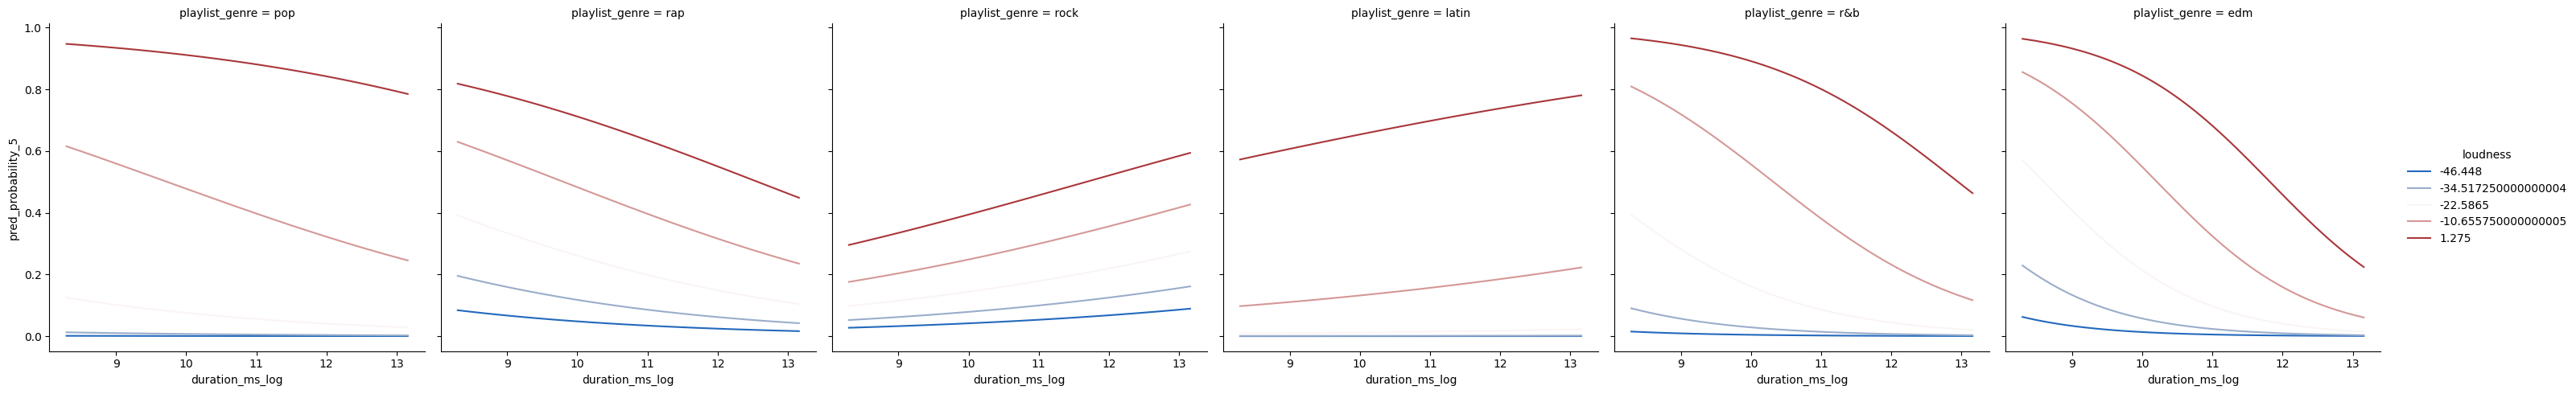

In [140]:
g= sns.relplot(data = dfviz, x='duration_ms_log', y='pred_probability_5', 
               hue='loudness',
               col='playlist_genre',
               kind='line', 
               palette='vlag', estimator=None, units='loudness')

plt.show()

#### Interpretation
👉 Predicted Probability depends on both `loudness` and `duration_ms`

👉 Loudness consistently boosts predicted probability

👉 The effect of duration on predicted probability differs based on genre

## F. Models: Performance and Validation 

In [143]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
kf.get_n_splits()

5

In [144]:
input_names = df.drop(columns=['y']).copy().columns.to_list()
input_names

['playlist_genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'speechiness_log',
 'acousticness_log',
 'instrumentalness_log',
 'liveness_log',
 'duration_ms_log']

In [145]:
output_name = 'y'

In [146]:
def train_and_test_logistic_with_cv(mod_name, a_formula, data_df, x_names, y_name, cv, threshold=0.5):
    # separate the inputs and output
    input_df = data_df.loc[ :, x_names ].copy()
    
    # initialize the performance metric storage lists
    train_res = []
    test_res = []
    
    # SPLIT the data and iterate over the folds
    for train_id, test_id in cv.split( input_df.to_numpy(), data_df[ y_name ].to_numpy() ):
        # subset the training and test splits within each fold
        train_data = data_df.iloc[ train_id, :].copy()
        test_data = data_df.iloc[ test_id, :].copy()
        
        # FIT the model on the TRAINING data within the current FOLD
        a_mod = smf.logit(formula=a_formula, data=train_data).fit()
        
        # PREDICT the TRAINING within each FOLD
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_mod.predict( train_data )
        train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0 )
        
        # PREDICT the TESTING within each FOLD
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_mod.predict( test_data )
        test_copy['pred_class'] = np.where( test_copy.pred_probability > threshold, 1, 0)
        
        # calculate the PERFORMANCE METRIC on the TRAINING SET within the FOLD
        train_res.append( np.mean( train_copy[ y_name ] == train_copy.pred_class ) )
        
        # calculate the PERFORMANCE METRIC on the TESTING SET within the FOLD
        test_res.append( np.mean( test_copy[ y_name ] == test_copy.pred_class ) )
    
    # book keeping to store the results
    train_df = pd.DataFrame({'Accuracy': train_res})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    
    test_df = pd.DataFrame({'Accuracy': test_res})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1
    
    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # add information about the model
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = len( a_mod.params )
    res_df['threshold'] = threshold
    
    return res_df

In [147]:
train_and_test_logistic_with_cv(0, formula_list[3], data_df=df, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.619315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619864
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621844
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620260
         Iterations 6


Accuracy  from_set  fold_id  model_name  \
0  0.646755  training        1           0   
1  0.644214  training        2           0   
2  0.646771  training        3           0   
3  0.642760  training        4           0   
4  0.645228  training        5           0   
5  0.639986   testing        1           0   
6  0.646623   testing        2           0   
7  0.641157   testing        3           0   
8  0.652971   testing        4           0   
9  0.642920   testing        5           0   

                                       model_formula  num_coefs  threshold  
0  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
1  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
2  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
3  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
4  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
5  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
6  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
7  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
8  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5  
9  y ~ playlist_genre + key + mode + tempo + loud...         18        0.5

In [148]:
train_and_test_logistic_with_cv(0, formula_list[5], data_df=df, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.611040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.612808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.612398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.614464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.612425
         Iterations 7


Accuracy  from_set  fold_id  model_name  \
0  0.658349  training        1           0   
1  0.656557  training        2           0   
2  0.657791  training        3           0   
3  0.653868  training        4           0   
4  0.658585  training        5           0   
5  0.651622   testing        1           0   
6  0.655264   testing        2           0   
7  0.650150   testing        3           0   
8  0.664962   testing        4           0   
9  0.653148   testing        5           0   

                                       model_formula  num_coefs  threshold  
0  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
1  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
2  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
3  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
4  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
5  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
6  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
7  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
8  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5  
9  y ~ playlist_genre * (tempo + loudness + valen...         66        0.5

In [149]:
train_and_test_logistic_with_cv(0, formula_list[7], data_df=df, x_names=input_names, y_name=output_name, cv=kf)

Optimization terminated successfully.
         Current function value: 0.593297
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.596232
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.595761
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.596898
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.595371
         Iterations 15


Accuracy  from_set  fold_id  model_name  \
0  0.676688  training        1           0   
1  0.670267  training        2           0   
2  0.672868  training        3           0   
3  0.671942  training        4           0   
4  0.673132  training        5           0   
5  0.651798   testing        1           0   
6  0.658614   testing        2           0   
7  0.659672   testing        3           0   
8  0.661435   testing        4           0   
9  0.658438   testing        5           0   

                                       model_formula  num_coefs  threshold  
0  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
1  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
2  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
3  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
4  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
5  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
6  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
7  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
8  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
9  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5

In [150]:
results_list = []

for m in range( len(formula_list) ):
    print( '-- Formula ID %d --' % m )
    
    try:
        results_list.append( train_and_test_logistic_with_cv(m, formula_list[m], data_df=df, x_names=input_names, y_name=output_name, cv=kf) )
    except:
        # what happens if there is an ERROR
        print( ' !!! Formula ID %d could NOT fit !!! ' % m)

-- Formula ID 0 --
Optimization terminated successfully.
         Current function value: 0.659211
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659226
         Iterations 4
-- Formula ID 1 --
Optimization terminated successfully.
         Current function value: 0.635259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635084
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636872
         Iterations 5
Optimization terminated successfully.
      

In [151]:
cv_results = pd.concat(results_list, ignore_index=True )
cv_results

Accuracy  from_set  fold_id  model_name  \
0   0.629519  training        1           0   
1   0.629491  training        2           0   
2   0.629491  training        3           0   
3   0.629491  training        4           0   
4   0.629491  training        5           0   
..       ...       ...      ...         ...   
75  0.651798   testing        1           7   
76  0.658614   testing        2           7   
77  0.659672   testing        3           7   
78  0.661435   testing        4           7   
79  0.658438   testing        5           7   

                                        model_formula  num_coefs  threshold  
0                                               y ~ 1          1        0.5  
1                                               y ~ 1          1        0.5  
2                                               y ~ 1          1        0.5  
3                                               y ~ 1          1        0.5  
4                                               y ~ 1          1        0.5  
..                                                ...        ...        ...  
75  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
76  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
77  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
78  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  
79  y ~ playlist_genre * ( (tempo + loudness + val...        396        0.5  

[80 rows x 7 columns]

In [166]:
cv_results.model_name.value_counts()

model_name
0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
Name: count, dtype: int64

In [167]:
cv_results['model_name'] = cv_results['model_name'].astype('category')

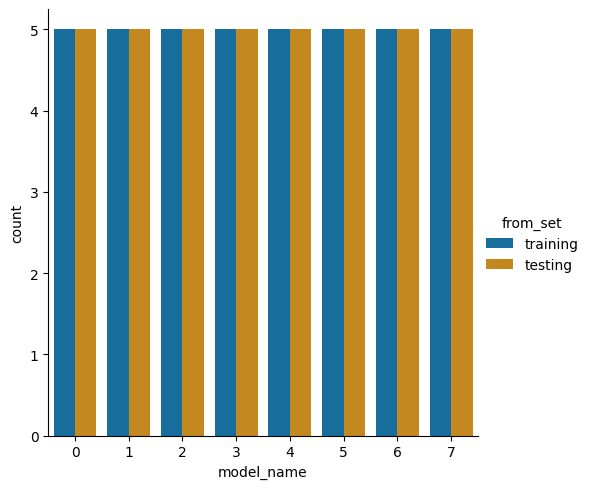

In [168]:
sns.catplot(data = cv_results, x='model_name', hue='from_set', kind='count')

plt.show()

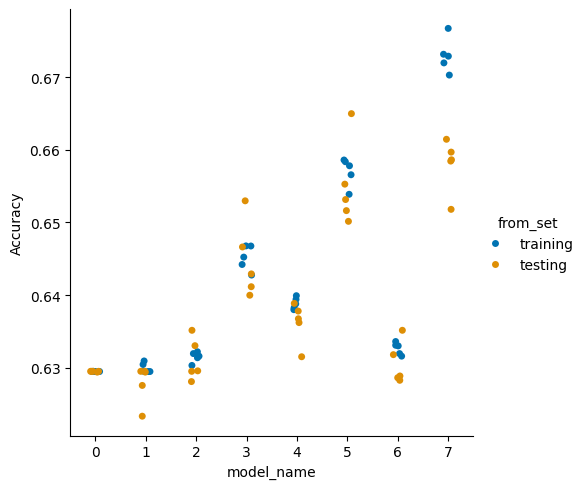

In [169]:
sns.catplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set')

plt.show()

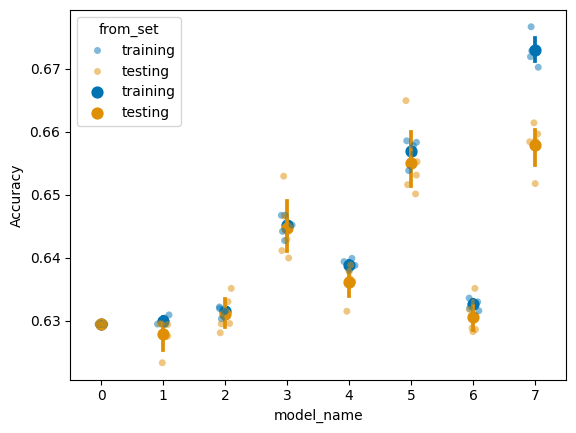

In [170]:
fig, ax = plt.subplots()

sns.stripplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', alpha=0.5, ax=ax)

sns.pointplot(data = cv_results, x='model_name', y='Accuracy', hue='from_set', linestyle='none', ax=ax)

plt.show()

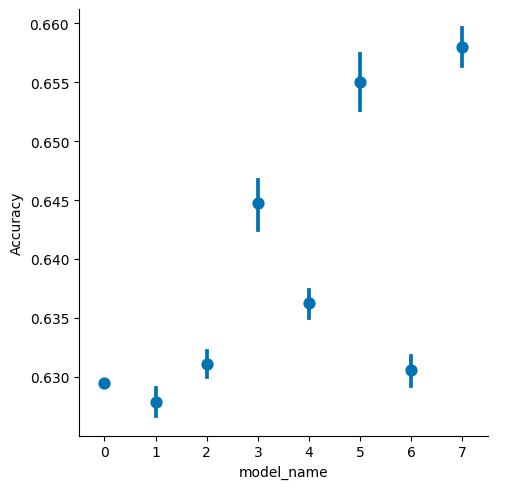

In [171]:
sns.catplot(data = cv_results.loc[ cv_results.from_set == 'testing', :],
            x='model_name', y='Accuracy', kind='point', linestyle='none',
            errorbar=('ci', 68))

plt.show()

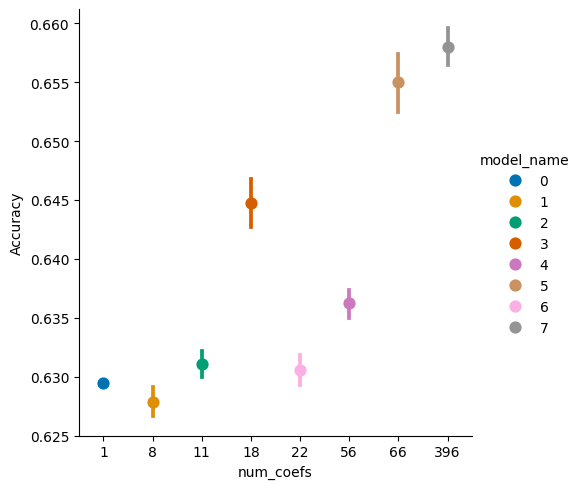

In [172]:
sns.catplot(data = cv_results.loc[ cv_results.from_set == 'testing', :],
            x='num_coefs', y='Accuracy', kind='point', linestyle='none',
            hue='model_name',
            errorbar=('ci', 68))

plt.show()

### Model Selection

🌟 Based on the above POINT PLOT, **Model 5** is the new **BEST model** because it has lesser coefficients and within the margin of error of the previous best model Model 7 🌟

In [174]:
best_model = smf.logit( formula=formula_list[5], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.612935
         Iterations 7


In [175]:
best_model.pvalues < 0.05

Intercept                                    True
playlist_genre[T.latin]                      True
playlist_genre[T.pop]                        True
playlist_genre[T.r&b]                       False
playlist_genre[T.rap]                        True
                                            ...  
playlist_genre[T.latin]:acousticness_log    False
playlist_genre[T.pop]:acousticness_log       True
playlist_genre[T.r&b]:acousticness_log       True
playlist_genre[T.rap]:acousticness_log      False
playlist_genre[T.rock]:acousticness_log      True
Length: 66, dtype: bool

In [177]:
dfviz['pred_probability'] = best_model.predict( input_grid )

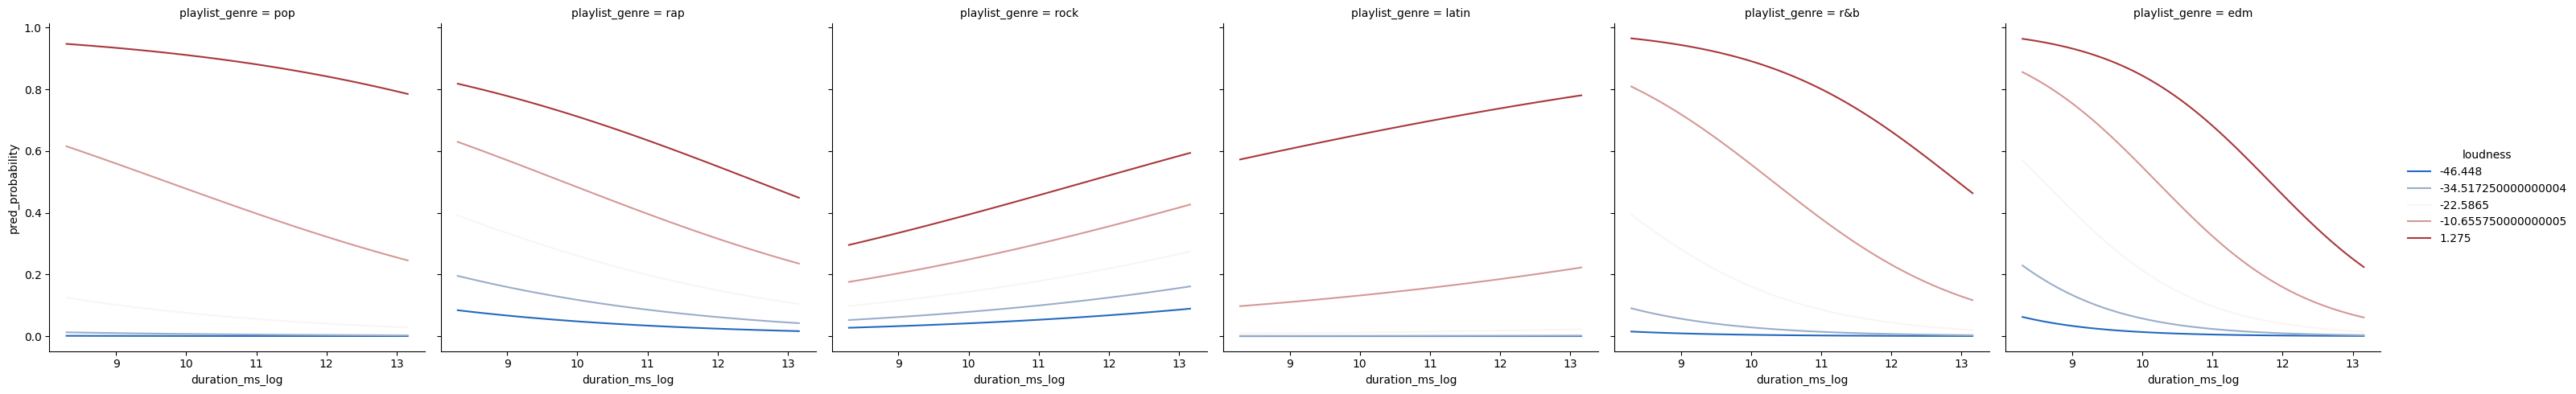

In [179]:
g= sns.relplot(data = dfviz, x='duration_ms_log', y='pred_probability', 
               hue='loudness', 
               col='playlist_genre',
               kind='line', 
               palette='vlag', estimator=None, units='loudness')

plt.show()

________________________________________________________________________________________